# 1. Basic workflow


This vignette shows the basic workflow of Via and how to access the different visualizations after running the computations. The dataset is a toy multifurcation.
We start by importing modules. 

In [2]:
from pyVIA.core import *
import pyVIA.datasets_via as datasets_via
import pandas as pd 
import scanpy as sc
# Settings the warnings to be ignored 
import warnings 
warnings.filterwarnings('ignore') 


First load all the data.  


In [3]:
adata_counts = datasets_via.toy_multifurcating()
print(adata_counts)
true_label = adata_counts.obs['group_id'].tolist()
ncomps = 30
sc.tl.pca(adata_counts, svd_solver='arpack', n_comps=ncomps)


AnnData object with n_obs × n_vars = 1000 × 1000
    obs: 'group_id', 'true_time'


### Expected Outputs
1. Cluster graph level trajectory highlighting cell type composition, pseudotime and start/end states 
2. Trajectory drawn onto embedding.
3. Lineage pathways depicting lineage probabilities towards each of the detected terminal states
4. Gene trends for each lineage for marker genes
5. Vector fields for fine-grained trajectory
6. Cluster graph trajectory colored by gene expression level

***!! NOTE !!***  An atlas embedding is computed in later steps of this tutorial. It is preferable to compute the embedding separately, rather than in the initial run_via() as it then allows for greater control of visualization parameters and to split the total run time into visual and TI. 

### Parameters
- `knn` number of nearest neighbors for the KNN-graph 
- `true_label`: list of annotations length nsamples. if these are unavailable then leave as default None
- `cluster_graph_pruning`: typically 0-3, the number of standard deviations for clustergraph pruning. level of pruning applied to the clustergraph carried forward for pseudotime and lineage probability calculations. Larger means less pruning  
- `edgepruning_cluster_resolution`: Controls granularity of clustering. range 0-1 is reasonable. values closer to 0 will result in more and smaller clusters  
- `too_big_factor`: default 0.3. Clusters that are bigger than 30% of the entire cell population will be re-clustered. Values 0.1-0.3 work well
- `preserve_disconnected`: default = True. Attempts to reconnect fragmentation incurred by pruning. if you suspect disconnected trajectories, set this to False
- `dataset` = `('' or 'group')` and is set based on the type of `root_user` parameter provided : `'group'` works for any dataset where the root is provided as a group ID in the true_label. e.g. if root_user = ['HSC'], then the root will be selected as a cluster which has root like properties and is largely made up of 'HSC' cells. `''` is suitable when `'root_user'` is a single-cell index or None
- `root_user`: default None. Can be provided at the group or single-cell index level. e.g. ['GroupX'] corresponding to a cell type in true_label or [1326] corresponding to a single cell index. If left as None, then in the case where velocity_matrix is available then a shortlist of 3 roots will be suggested. When root_user is None and velocity_matrix is None, then a root is chosen at random
- `edgebundle_pruning_twice`: default = False. When True, can sometimes further simplify the visualization if the edges are too numerous/cluttered. it does not impact the pseudotime and lineage computations
- `memory`: default =5. Higher memory, root-to-fate pathways have fewer detours into unrelated populations, but can also restrict search paths in the case of poorly connected rarer cell types
-  `do_compute_embedding`: default =False.
-  `embedding_type`: str 'via-atlas' or 'via-mds'




In [6]:
#define parameters
ncomps, knn, random_seed, dataset, root_user, memory  =30,20, 42,'toy', ['M1'], 20

v0 = VIA(adata_counts.obsm['X_pca'][:, 0:ncomps], true_label, edgepruning_clustering_resolution=0.15, edgepruning_clustering_resolution_local=1,
             knn=knn, cluster_graph_pruning=1, too_big_factor=0.3, root_user=root_user, preserve_disconnected=True, dataset='group',
             random_seed=random_seed,memory=memory)#, do_compute_embedding=True, embedding_type='via-atlas') #set these options if you wish to run the embedding during the TI computation. embedding_type = 'via-mds' is extremely fast, and useful for a "quick" view
v0.run_VIA()


2023-10-05 18:06:24.822774	Running VIA over input data of 1000 (samples) x 30 (features)
2023-10-05 18:06:24.823049	Knngraph has 20 neighbors
2023-10-05 18:06:25.262695	Finished global pruning of 20-knn graph used for clustering at level of 0.15. Kept 46.7 % of edges. 
2023-10-05 18:06:25.272539	Number of connected components used for clustergraph  is 1
2023-10-05 18:06:25.332702	Commencing community detection
2023-10-05 18:06:25.350602	Finished running Leiden algorithm. Found 43 clusters.
2023-10-05 18:06:25.351692	Merging 30 very small clusters (<10)
2023-10-05 18:06:25.352976	Finished detecting communities. Found 13 communities
2023-10-05 18:06:25.353277	Making cluster graph. Global cluster graph pruning level: 1
2023-10-05 18:06:25.358068	Graph has 1 connected components before pruning
2023-10-05 18:06:25.360327	Graph has 1 connected components after pruning
2023-10-05 18:06:25.360556	Graph has 1 connected components after reconnecting
2023-10-05 18:06:25.361379	0.0% links trimmed 

  0%|          | 0/1300 [00:00<?, ?it/s]

memory for rw2 hittings times  2. Using rw2 based pt
do scaling of pt
2023-10-05 18:06:30.366814	Identifying terminal clusters corresponding to unique lineages...
2023-10-05 18:06:30.366846	Closeness:[3, 4, 5, 6, 7, 8, 9, 10]
2023-10-05 18:06:30.366863	Betweenness:[3, 4, 6, 7, 8, 9, 10]
2023-10-05 18:06:30.366875	Out Degree:[0, 3, 4, 6, 7, 8, 9, 10]
2023-10-05 18:06:30.367496	Terminal clusters corresponding to unique lineages in this component are [4, 7, 8, 9, 10] 
TESTING rw2_lineage probability at memory 20
testing rw2 lineage probability at memory 20
g.indptr.size, 14


  0%|          | 0/1000 [00:00<?, ?it/s]

2023-10-05 18:06:35.151481	 Cluster or terminal cell fate 4 is reached 205.0 times
2023-10-05 18:06:35.221595	 Cluster or terminal cell fate 7 is reached 232.0 times
2023-10-05 18:06:35.286493	 Cluster or terminal cell fate 8 is reached 516.0 times
2023-10-05 18:06:35.351220	 Cluster or terminal cell fate 9 is reached 511.0 times
2023-10-05 18:06:35.416126	 Cluster or terminal cell fate 10 is reached 239.0 times
2023-10-05 18:06:35.425591	There are (5) terminal clusters corresponding to unique lineages {4: 'M6', 7: 'M2', 8: 'M5', 9: 'M4', 10: 'M8'}
2023-10-05 18:06:35.425653	Begin projection of pseudotime and lineage likelihood
2023-10-05 18:06:35.617196	Cluster graph layout based on forward biasing
2023-10-05 18:06:35.618877	Starting make edgebundle viagraph...
2023-10-05 18:06:35.618912	Make via clustergraph edgebundle
2023-10-05 18:06:35.848065	Hammer dims: Nodes shape: (13, 2) Edges shape: (26, 3)
2023-10-05 18:06:35.849614	Graph has 1 connected components before pruning
2023-10-05

### VIA graph

To visualize the results of the Trajectory inference in various ways. Via offers various plotting functions.We first show the cluster-graph level trajectory abstraction consisting of two subplots colored by annotated (true_label) composition and by pseudotime

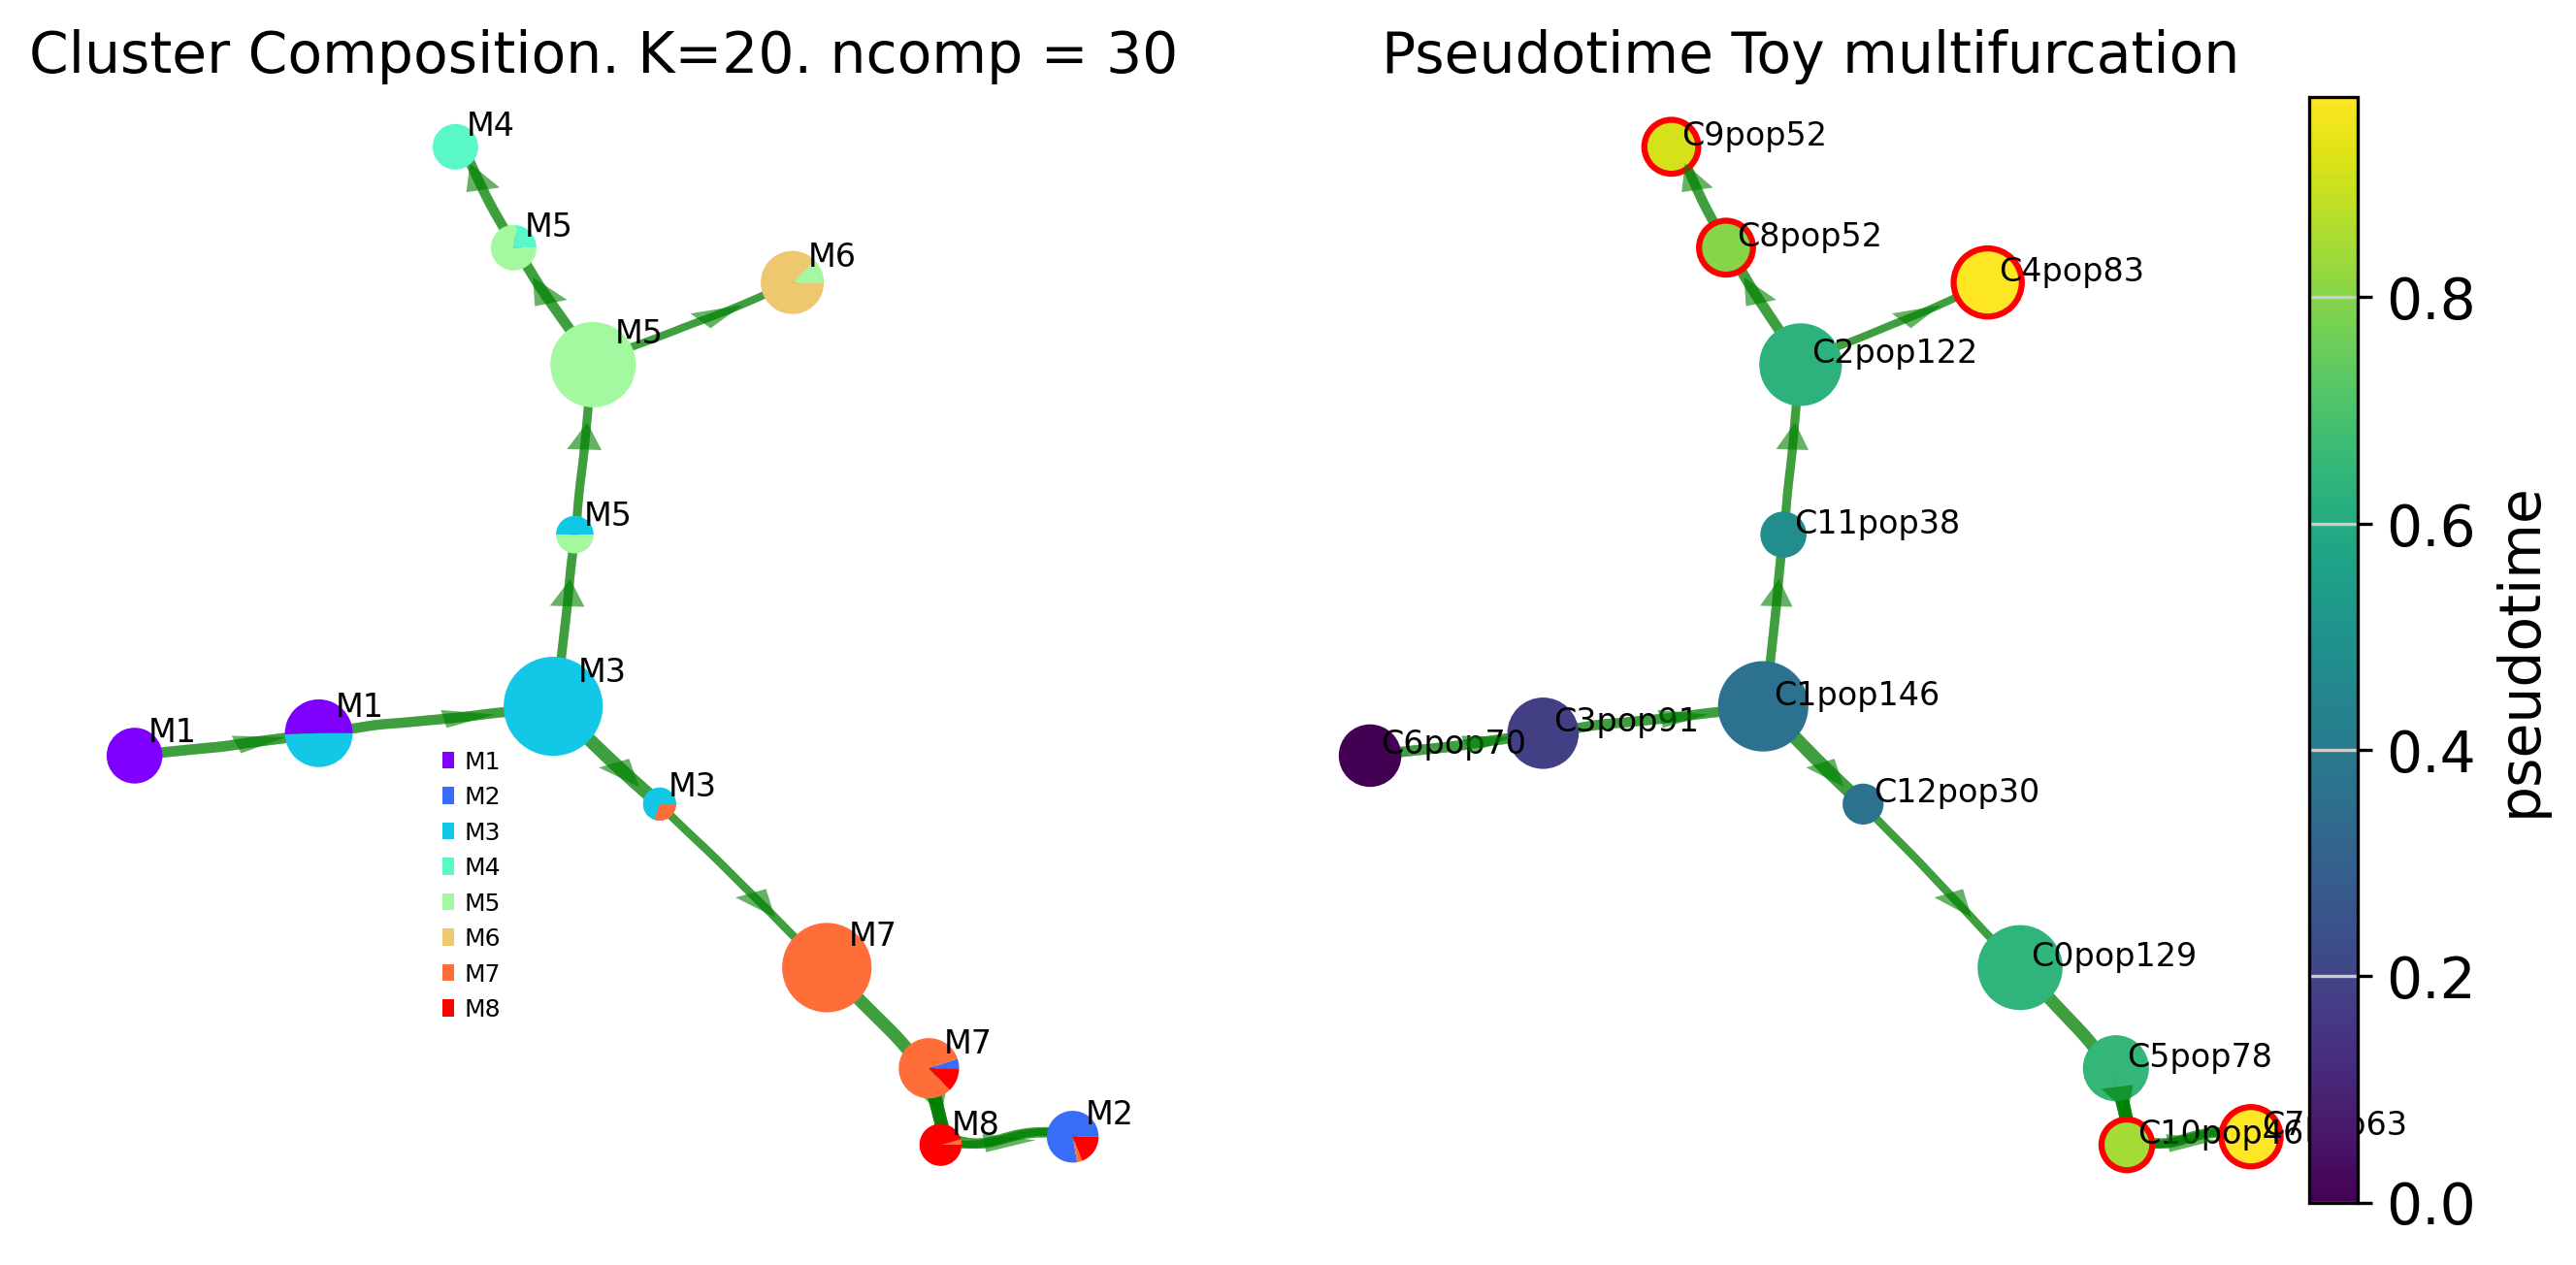

In [7]:
# draw the piechart clustergraph beside a clustergraph colored by the pseudotime ('pt') or gene expression ('gene').
# type_pt: 'pt' automatically takes the cluster level pseudotimes. 'gene' requires user to also pass gene_exp 
# gene_exp =''. In order to plot gene intensity, a list of cluster level gene/feature values should be provided as a list
# cmap = None. Can be specified and influences the cmap of the pt/gene graph
# ax_text = True. Can set to false if you don't want the cluster and populations labels 
# other features like edge width, color, alpha can be set here too
# Terminal lineage clusters have red outline (in rhs graph)
fig, ax, ax2= plot_piechart_viagraph(via_object=v0, type_data='pt', title='Toy multifurcation', cmap='viridis', ax_text=True, gene_exp='', alpha_edge=0.5, linewidth_edge=1.5, edge_color='green', headwidth_arrow=0.2)
fig.set_size_inches(10,5)

## Creating Via Atlas Embeddings and coloring Scatter Plots

### Fast visualization using underlying single-cell VIA-graphs

- VIA offers two embedding options generated together with the trajectory by combining the underlying trajectory graph with different manifold projections:
    1. `via_atlas_emb()` Uses Umap's optimization function but uses TI-based graph information from Via. Very useful for large scale data and time-series atlases. See visualization [galleries]('https://pyvia.readthedocs.io/en/latest/Atlas%20view%20examples.html') and [tutorials]('https://pyvia.readthedocs.io/en/latest/Zebrahub_tutorial_visualization.html')  
    2. `via_mds()`. Great for a quick visualization (computes in seconds/ minutes even for large data) and can often be as informative as via_atlas_emb

- For automated computation (a bit easier but not recommended for larger datasets): simply initialize VIA with parameters `do_compute_embedding = True`, and `embedding_type = 'via-mds' or 'via-atlas'`.

***!!! NOTE !!!*** Remember to assign via_object.embedding to the computed 2d embedding array of size (n_cells x2) when using the various plotting functions   





X-input (1000, 30)
len membership and n_cells 1000 1000
n cell 1000
2023-10-05 18:14:22.816339	Computing embedding on sc-Viagraph
2023-10-05 18:14:22.817036	using via cluster graph to initialize embedding


  0%|          | 0/100 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


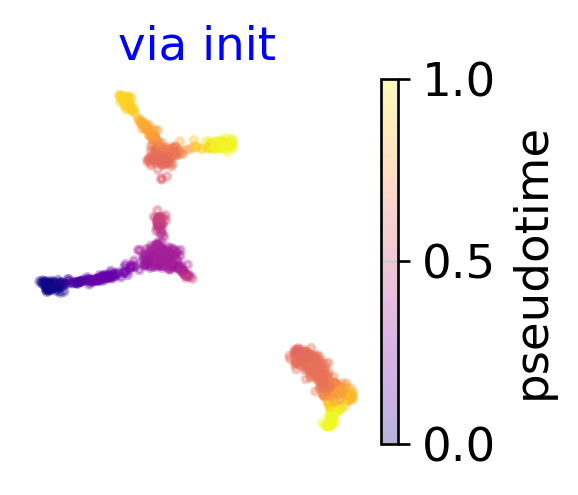

In [13]:
em2 = via_atlas_emb(via_object=v0,init_pos='via')
# optionally use UMAP/Phate/tsne 
# embedding = umap.UMAP().fit_transform(adata_counts.obsm['X_pca'][:, 0:10]) #if you wish, you can use a precomputed embedding (umap, t-sne)

f,ax=plot_scatter(embedding=em2, labels=v0.single_cell_pt_markov, cmap = 'plasma', title='via init')
f.set_size_inches(2,2)


## Using via-mds

### VIA-mds Parameters
- `n_milestones` (default 2000) larger number takes longer time and more RAM
- `double_diffusion` (default False) setting True can sharpen the "strokes"
- `t_diffusion` (default 1) higher values can incur more smoothing
- `time_series_labels` (list of numeric values, length n_samples representing some kind of sequential/temporal information, such as sampling times). 

2023-10-05 18:17:09.048707	Commencing Via-MDS
2023-10-05 18:17:09.048798	Resetting n_milestones to 1000 as n_samples > original n_milestones
2023-10-05 18:17:09.623412	Start computing with diffusion power:1
2023-10-05 18:17:09.643245	Starting MDS on milestone
2023-10-05 18:17:11.031322	End computing mds with diffusion power:1
2023-10-05 18:17:11.088270	Commencing Via-MDS
2023-10-05 18:17:11.088315	Resetting n_milestones to 1000 as n_samples > original n_milestones
2023-10-05 18:17:11.636736	Start computing with diffusion power:1
2023-10-05 18:17:11.652445	Starting MDS on milestone
2023-10-05 18:17:13.016044	End computing mds with diffusion power:1


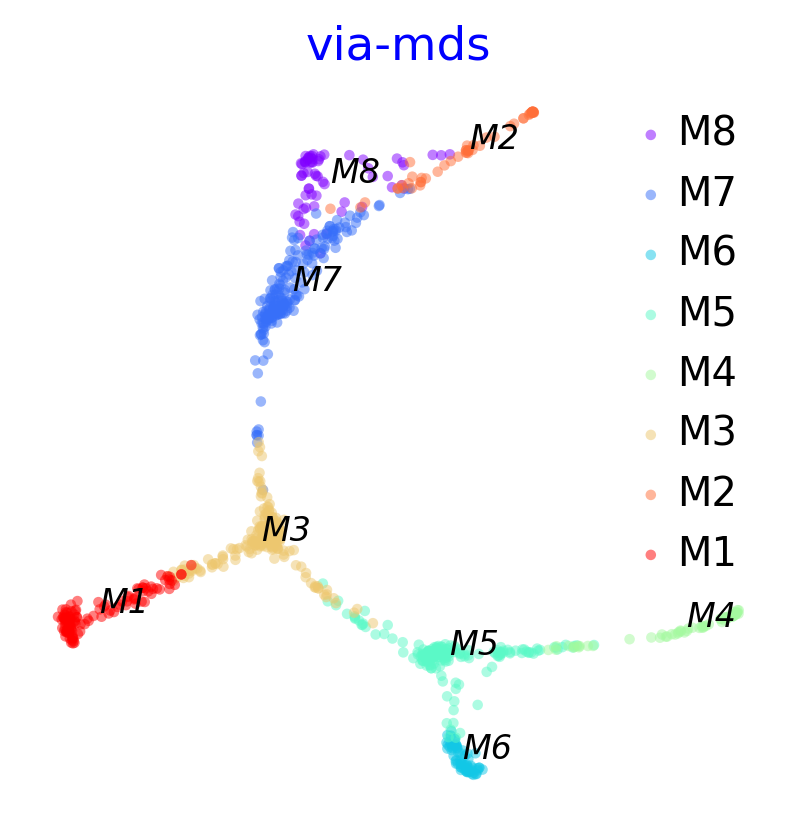

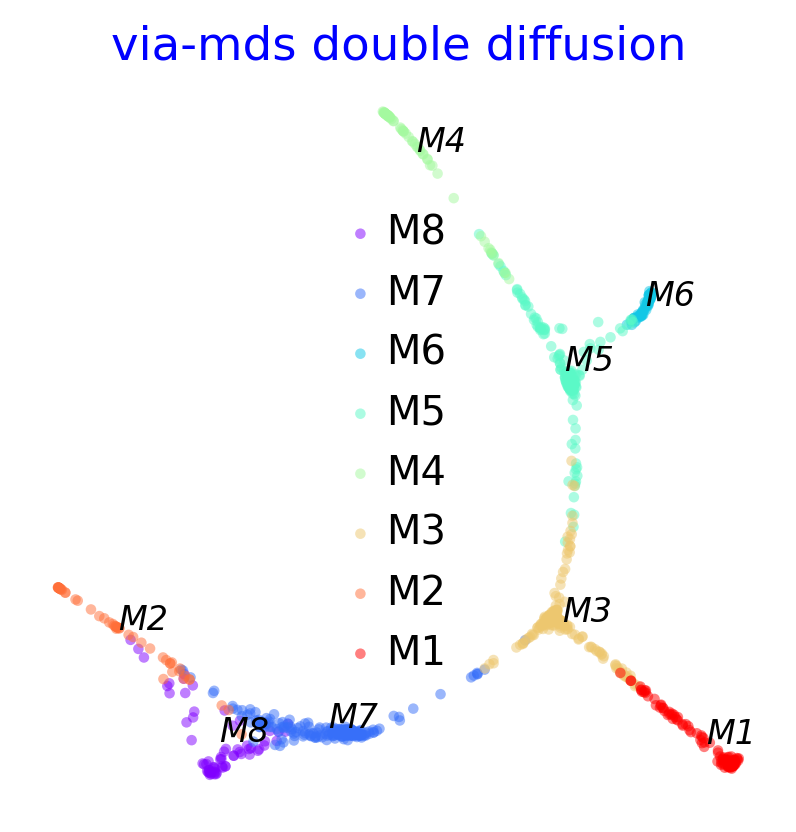

In [14]:
via_mds_embedding1 = via_mds(via_object=v0)
f, ax = plot_scatter(embedding=via_mds_embedding1, labels=v0.true_label, s=10, alpha=0.5, title='via-mds')

via_mds_embedding2 = via_mds(via_object=v0, double_diffusion = True)
f, ax = plot_scatter(embedding=via_mds_embedding2, labels=v0.true_label, s=10, alpha=0.5,title='via-mds double diffusion')

### Vector field
The vector field of trajectories is projected onto the embedding 

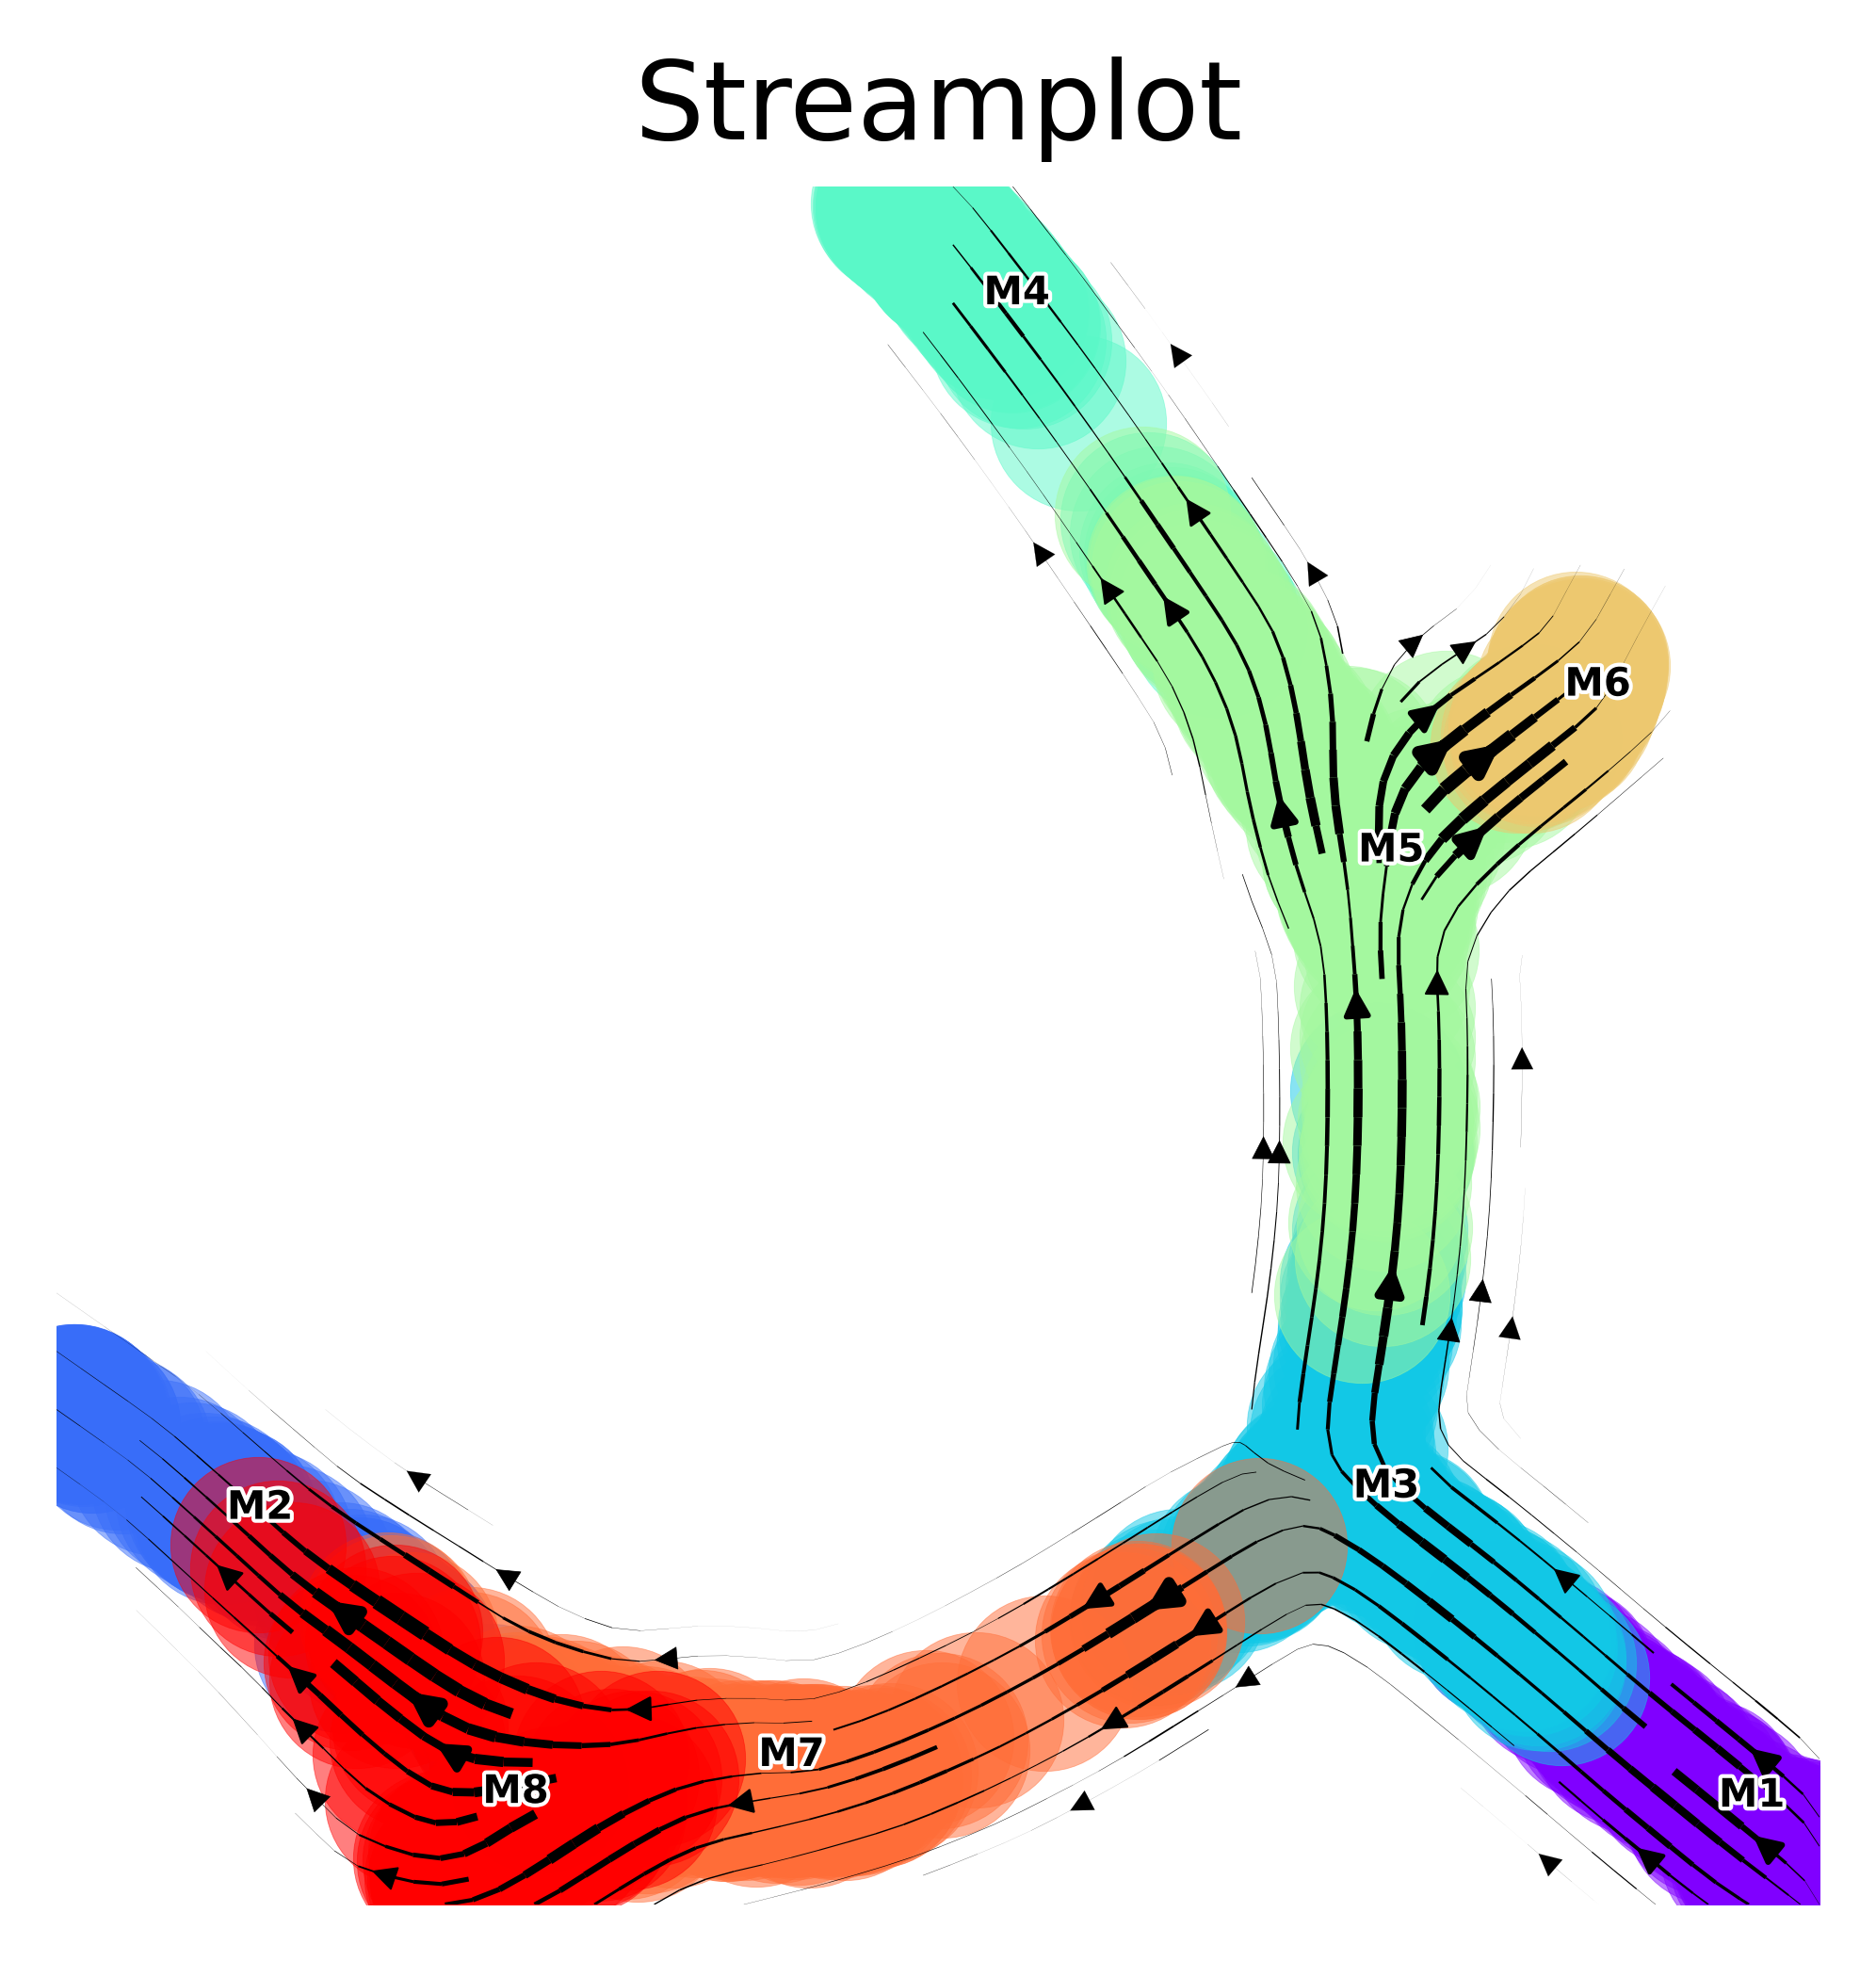

In [18]:
#default parameters:
# scatter_size=500
# scatter_alpha=0.5
# marker_edgewidth=0.1, outline of scatter points
# density_stream = 2, spacing between field lines
# smooth_transition=1,smoothing of transition matrix over neighbors of neighbors
# color_scheme = 'annotation', corresponds to true_labels  (cell types) provided. Can also be set to 'cluster' and 'time' and 'other'
# add_outline_clusters=False
# other_labels = [] provide a list of values for each cell corresponding to the value / annotation you wish to plot
v0.embedding = via_mds_embedding2
f, ax = via_streamplot(v0)
f.set_size_inches(4,4)

2022-08-24 20:32:55.315504	Inside animated. File will be saved to location /home/shobi/Trajectory/Datasets/Toy3/test_toy3.gif
total number of stream lines 2329


  0%|          | 0/27 [00:00<?, ?it/s]


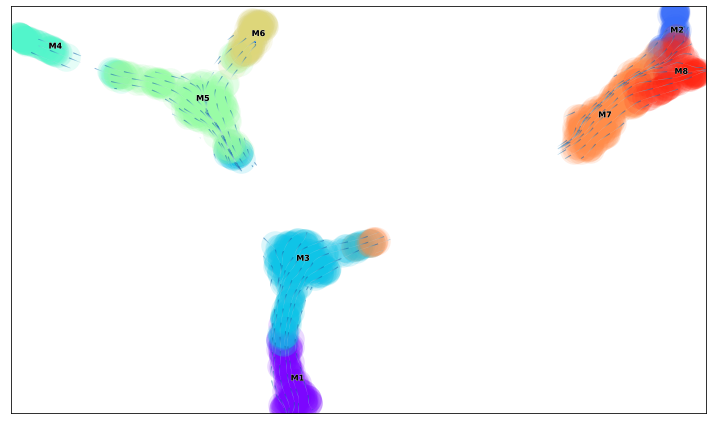

In [10]:
animate_streamplot(v0, embedding=via_mds_embedding2, scatter_size=800, scatter_alpha=0.15, density_grid=2,  saveto='/home/shobi/Trajectory/Datasets/Toy3/test_toy3.gif' )

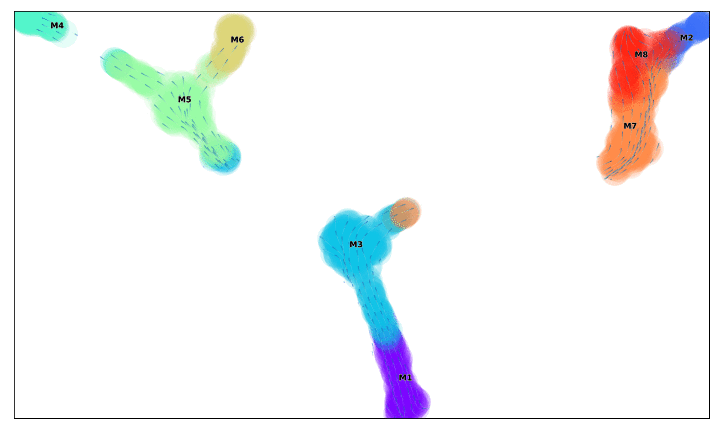

In [15]:
from IPython.display import Image
with open('/home/shobi/Trajectory/Datasets/Toy3/test_toy3.gif','rb') as file:
    display(Image(file.read()))

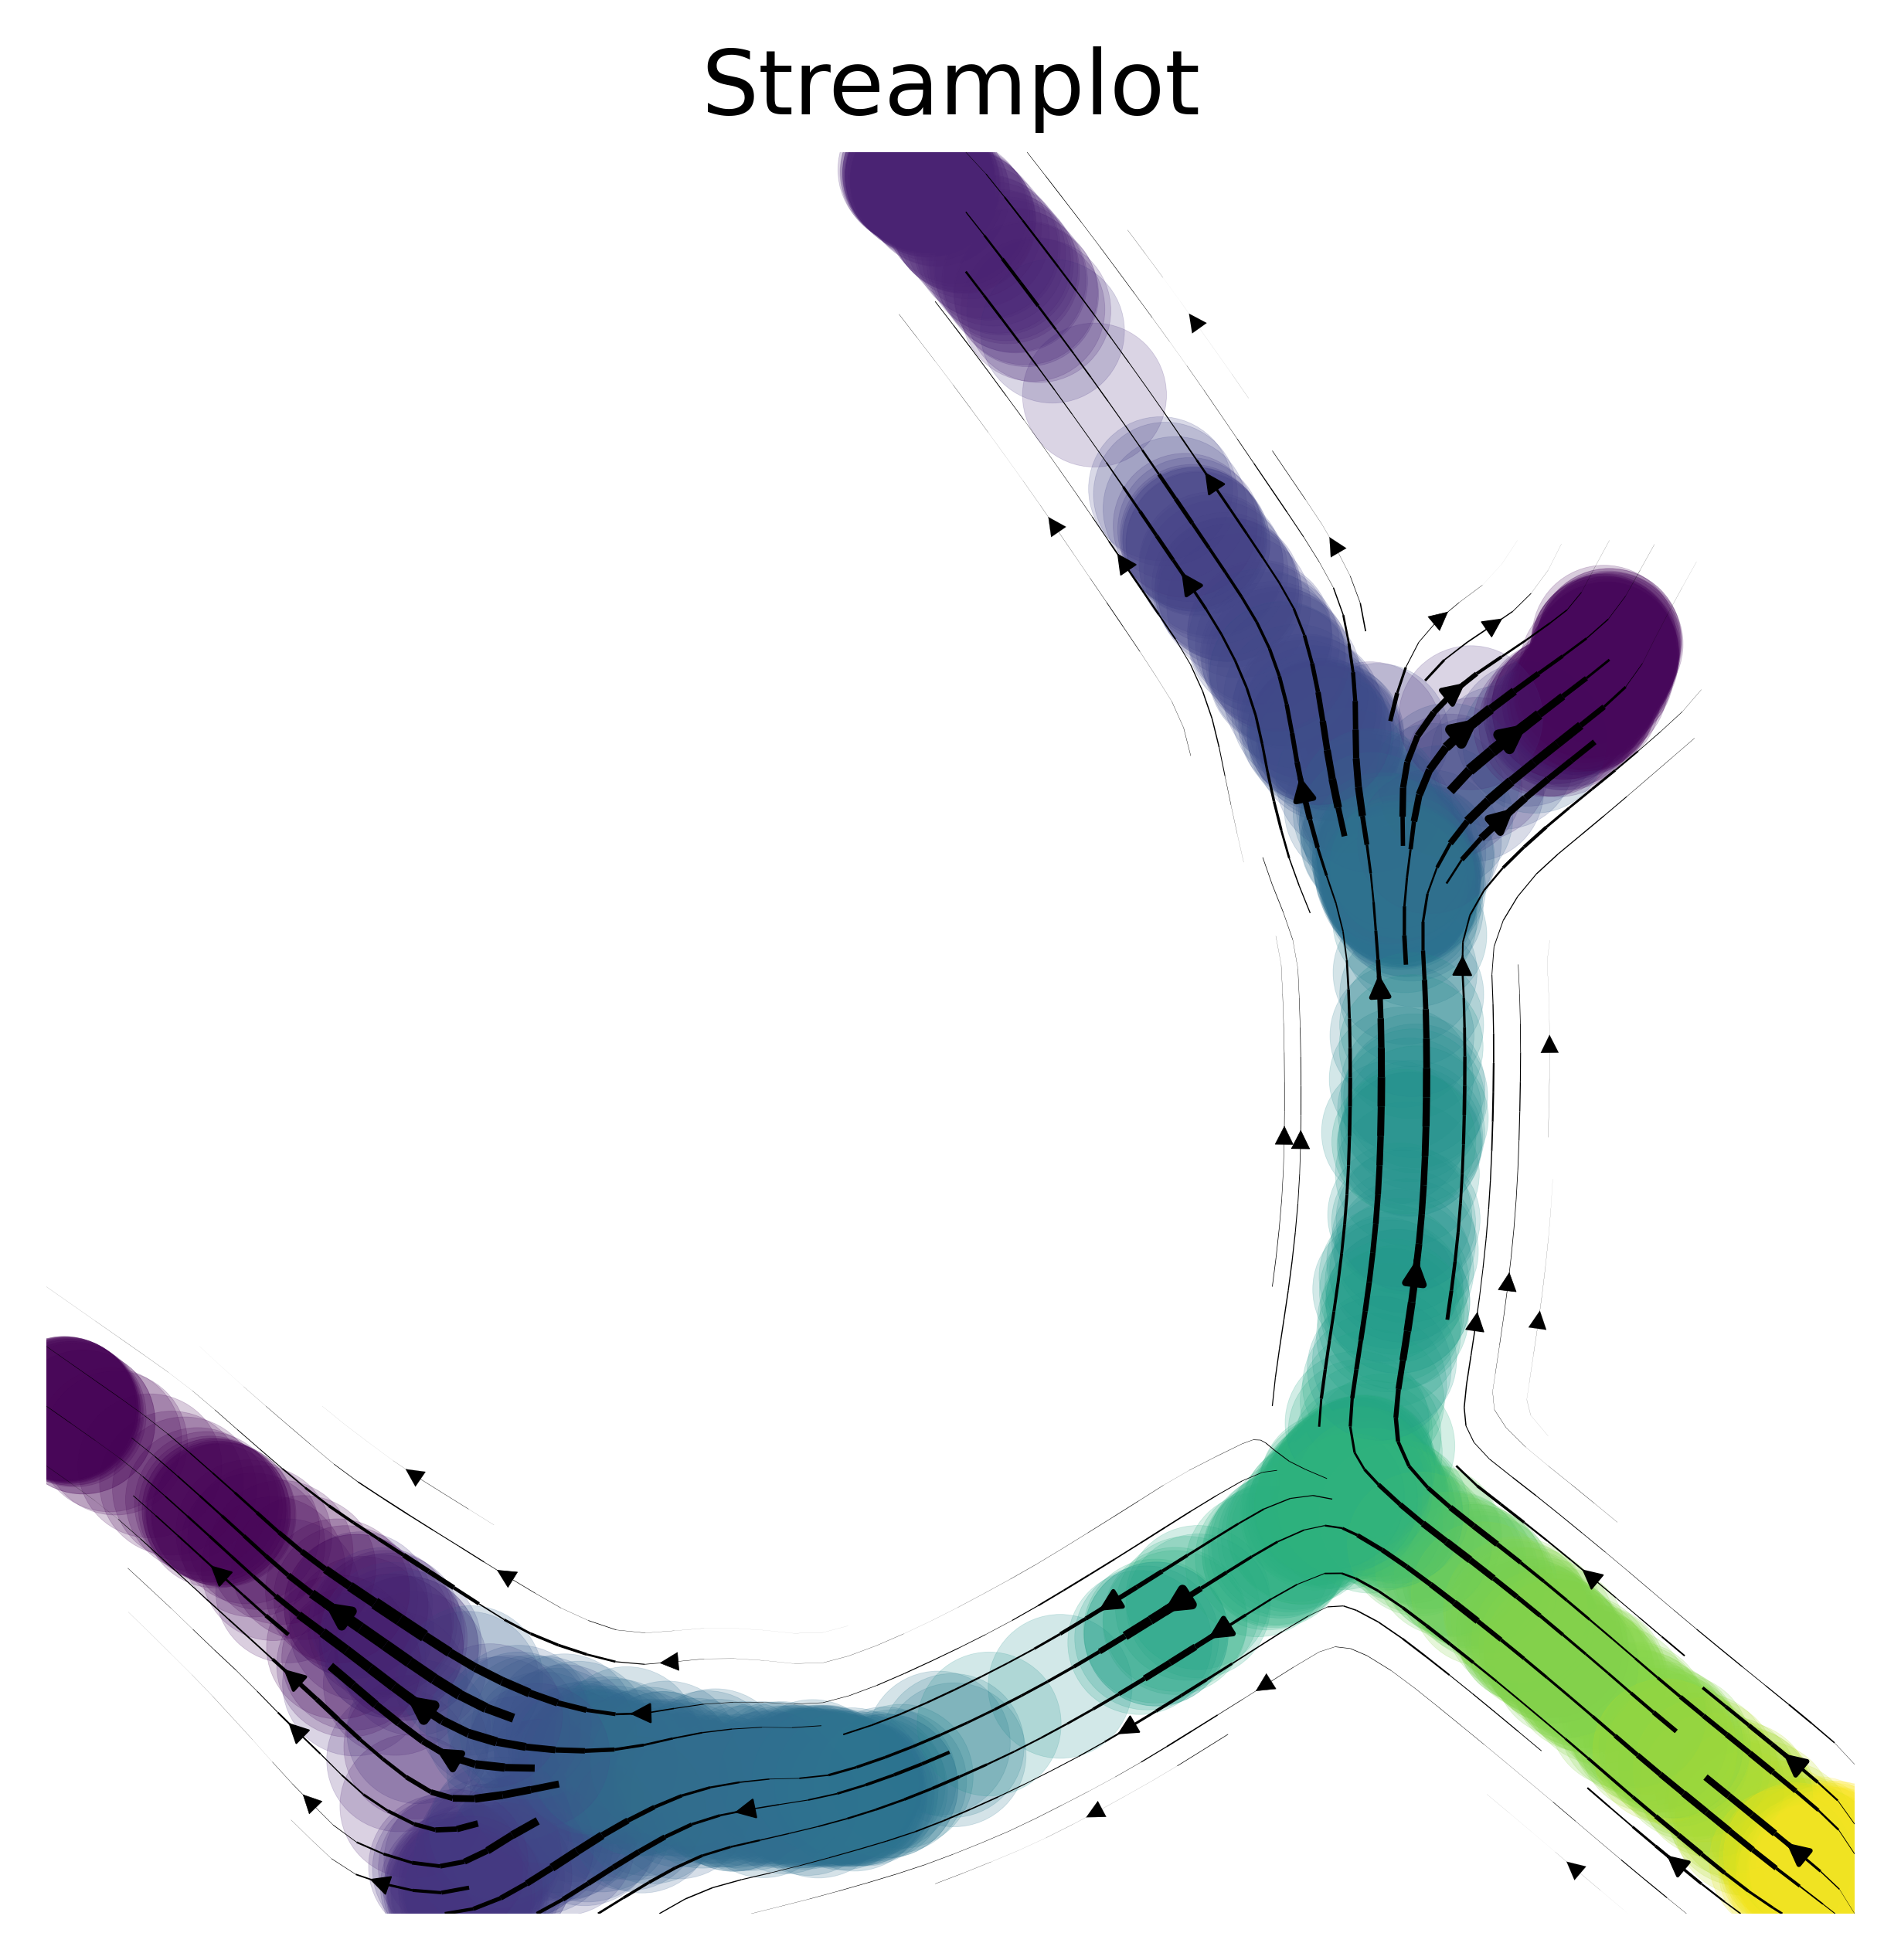

In [19]:
f, ax =via_streamplot(v0, embedding=via_mds_embedding2, color_scheme='time',linewidth=1,min_mass = 1, cutoff_perc = 5,scatter_size=500, scatter_alpha=0.2,marker_edgewidth=0.1, density_stream = 2, smooth_transition=1, smooth_grid=.5)# other args: add_outline_clusters=True, cluster_outline_edgewidth =0.005
f.set_size_inches(5,5)

### Overall trajectory 
Draw overall pseudotime and main trajectories on single cell embedding 

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |#######################

2023-10-05 18:24:31.303970	Super cluster 4 is a super terminal with sub_terminal cluster 4
2023-10-05 18:24:31.304304	Super cluster 7 is a super terminal with sub_terminal cluster 7
2023-10-05 18:24:31.304337	Super cluster 8 is a super terminal with sub_terminal cluster 8
2023-10-05 18:24:31.304370	Super cluster 9 is a super terminal with sub_terminal cluster 9
2023-10-05 18:24:31.304398	Super cluster 10 is a super terminal with sub_terminal cluster 10


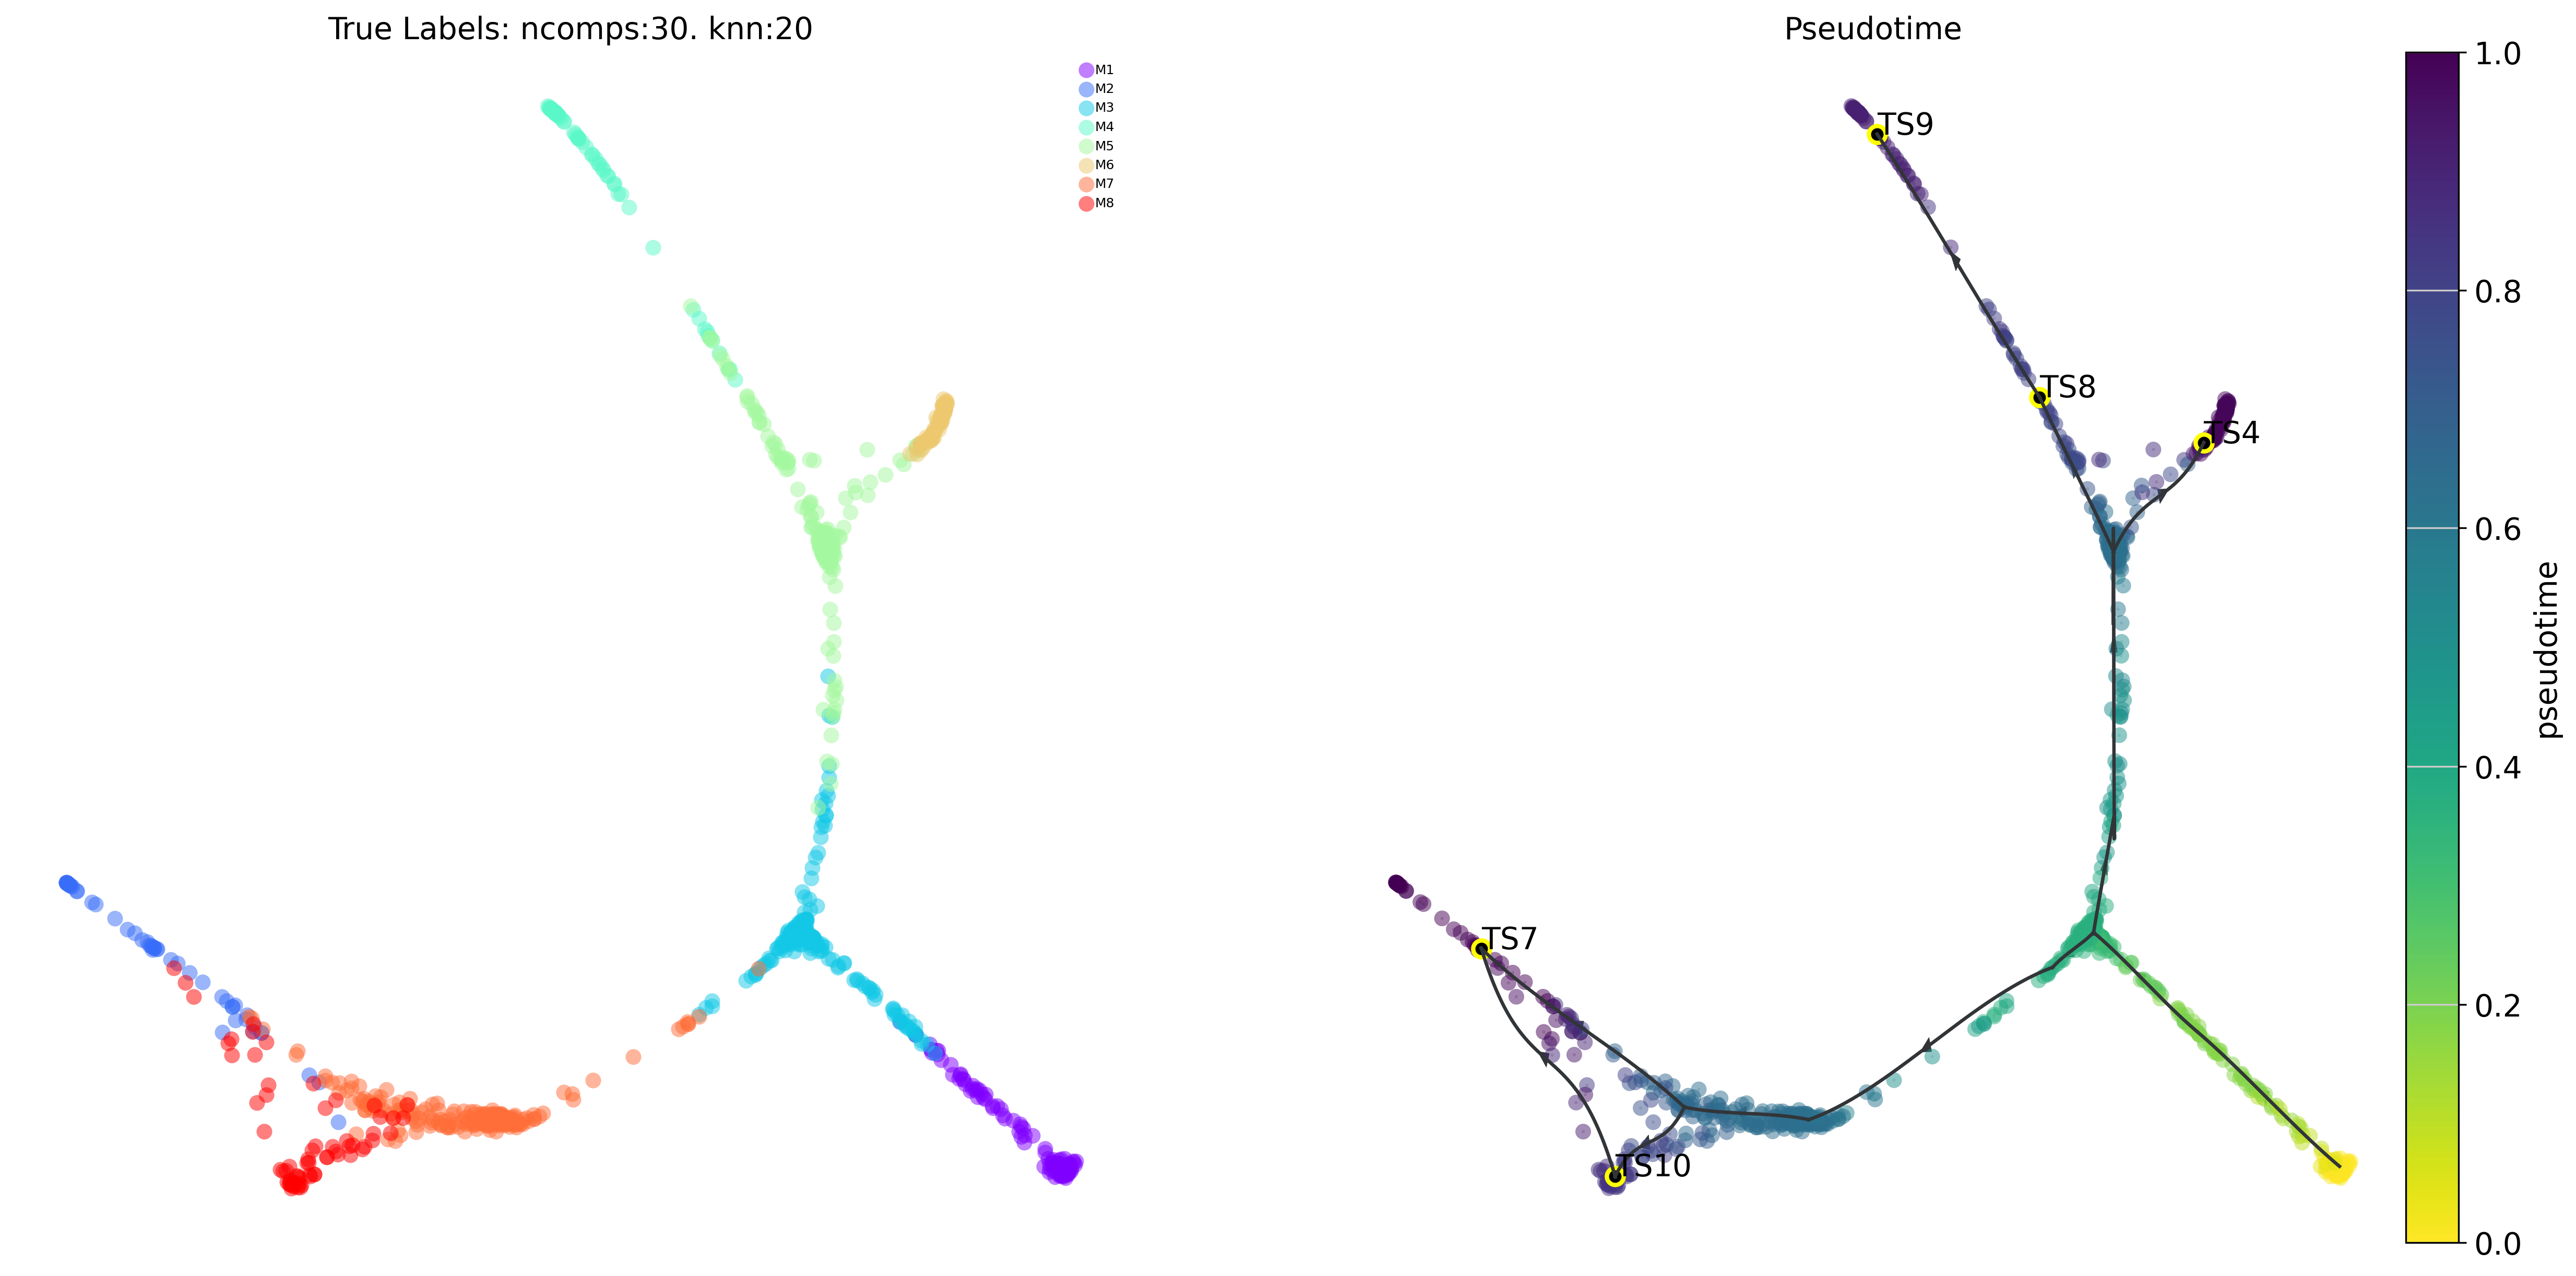

In [20]:
# draw overall pseudotime and main trajectories
plot_trajectory_curves(via_object=v0)# or set  embedding=embedding_of_your_choice
plt.show()

### The Atlas View 


2023-10-05 18:27:20.495400	Computing Edges
2023-10-05 18:27:20.495468	Start finding milestones
2023-10-05 18:27:21.030727	End milestones with 25
2023-10-05 18:27:21.034195	Recompute weights
2023-10-05 18:27:21.037433	pruning milestone graph based on recomputed weights
2023-10-05 18:27:21.039138	Graph has 1 connected components before pruning
2023-10-05 18:27:21.040621	Graph has 1 connected components after pruning
2023-10-05 18:27:21.040970	Graph has 1 connected components after reconnecting
2023-10-05 18:27:21.043513	regenerate igraph on pruned edges
2023-10-05 18:27:21.050219	Setting numeric label as time_series_labels or other sequential metadata for coloring edges
2023-10-05 18:27:21.056527	Making smooth edges
inside add sc embedding second if
2023-10-05 18:27:21.446300	Computing Edges
2023-10-05 18:27:21.446336	Start finding milestones
2023-10-05 18:27:22.082208	End milestones with 50
2023-10-05 18:27:22.088927	Recompute weights
2023-10-05 18:27:22.098839	pruning milestone graph b

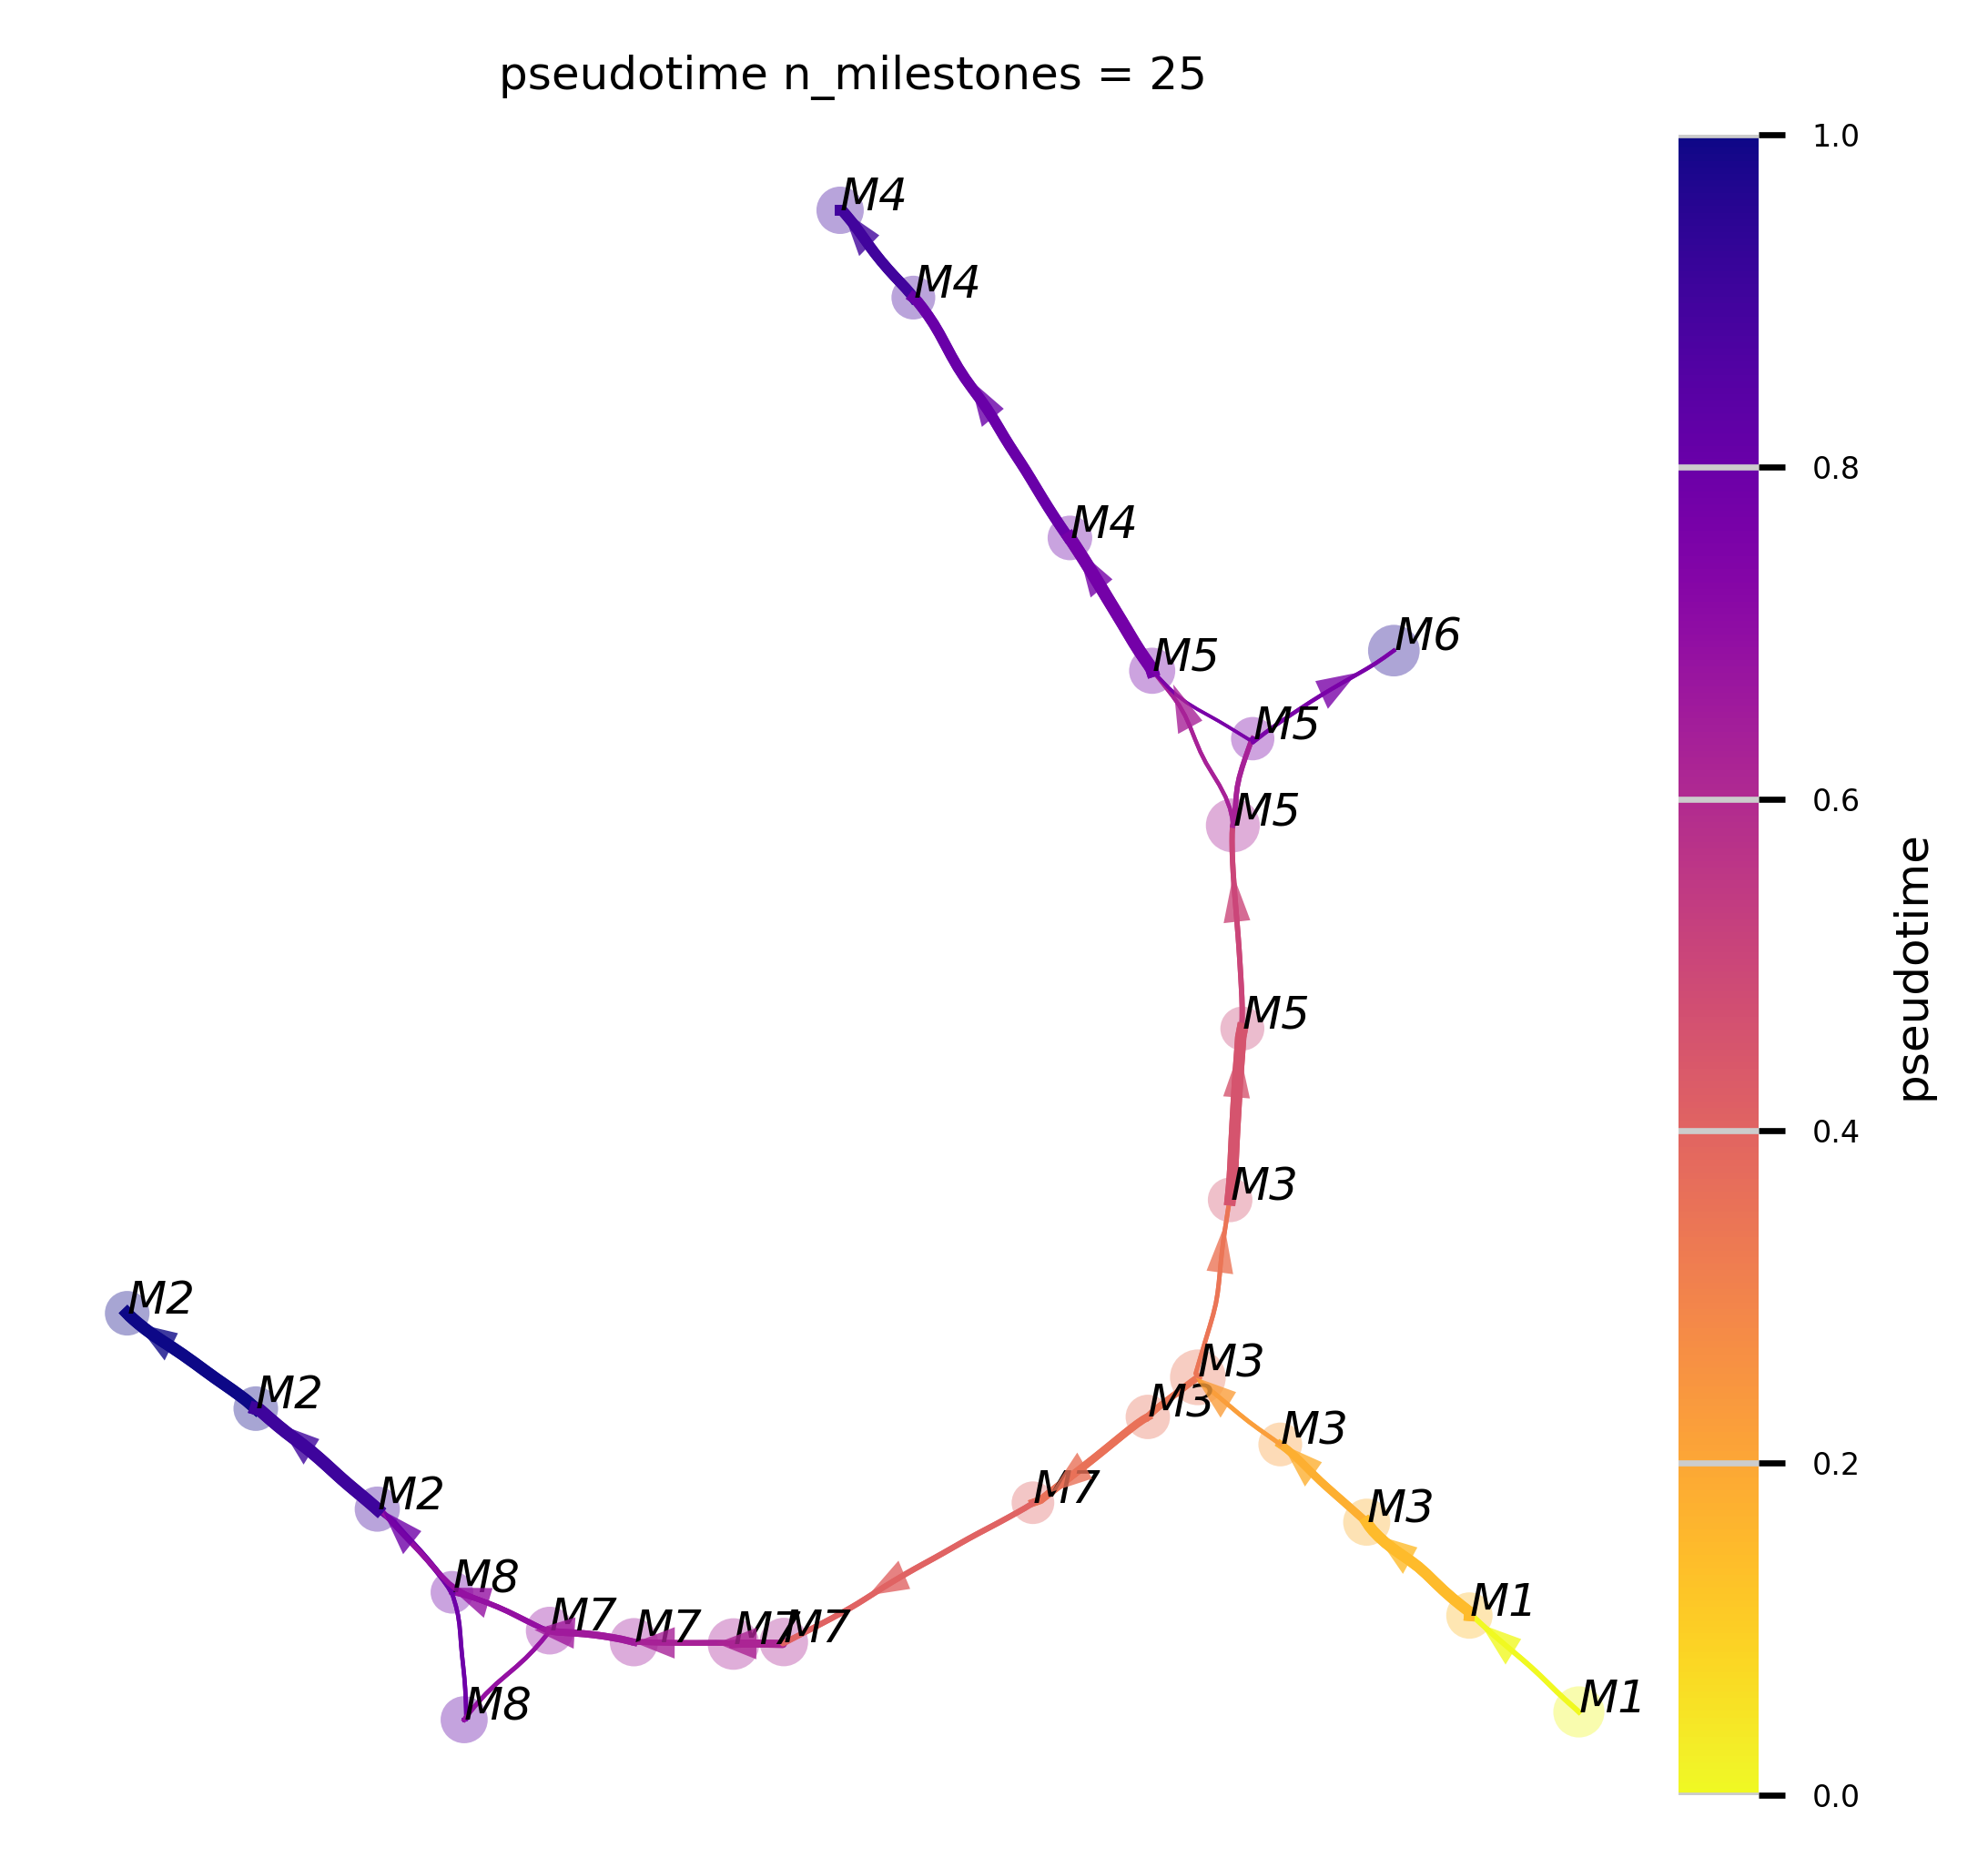

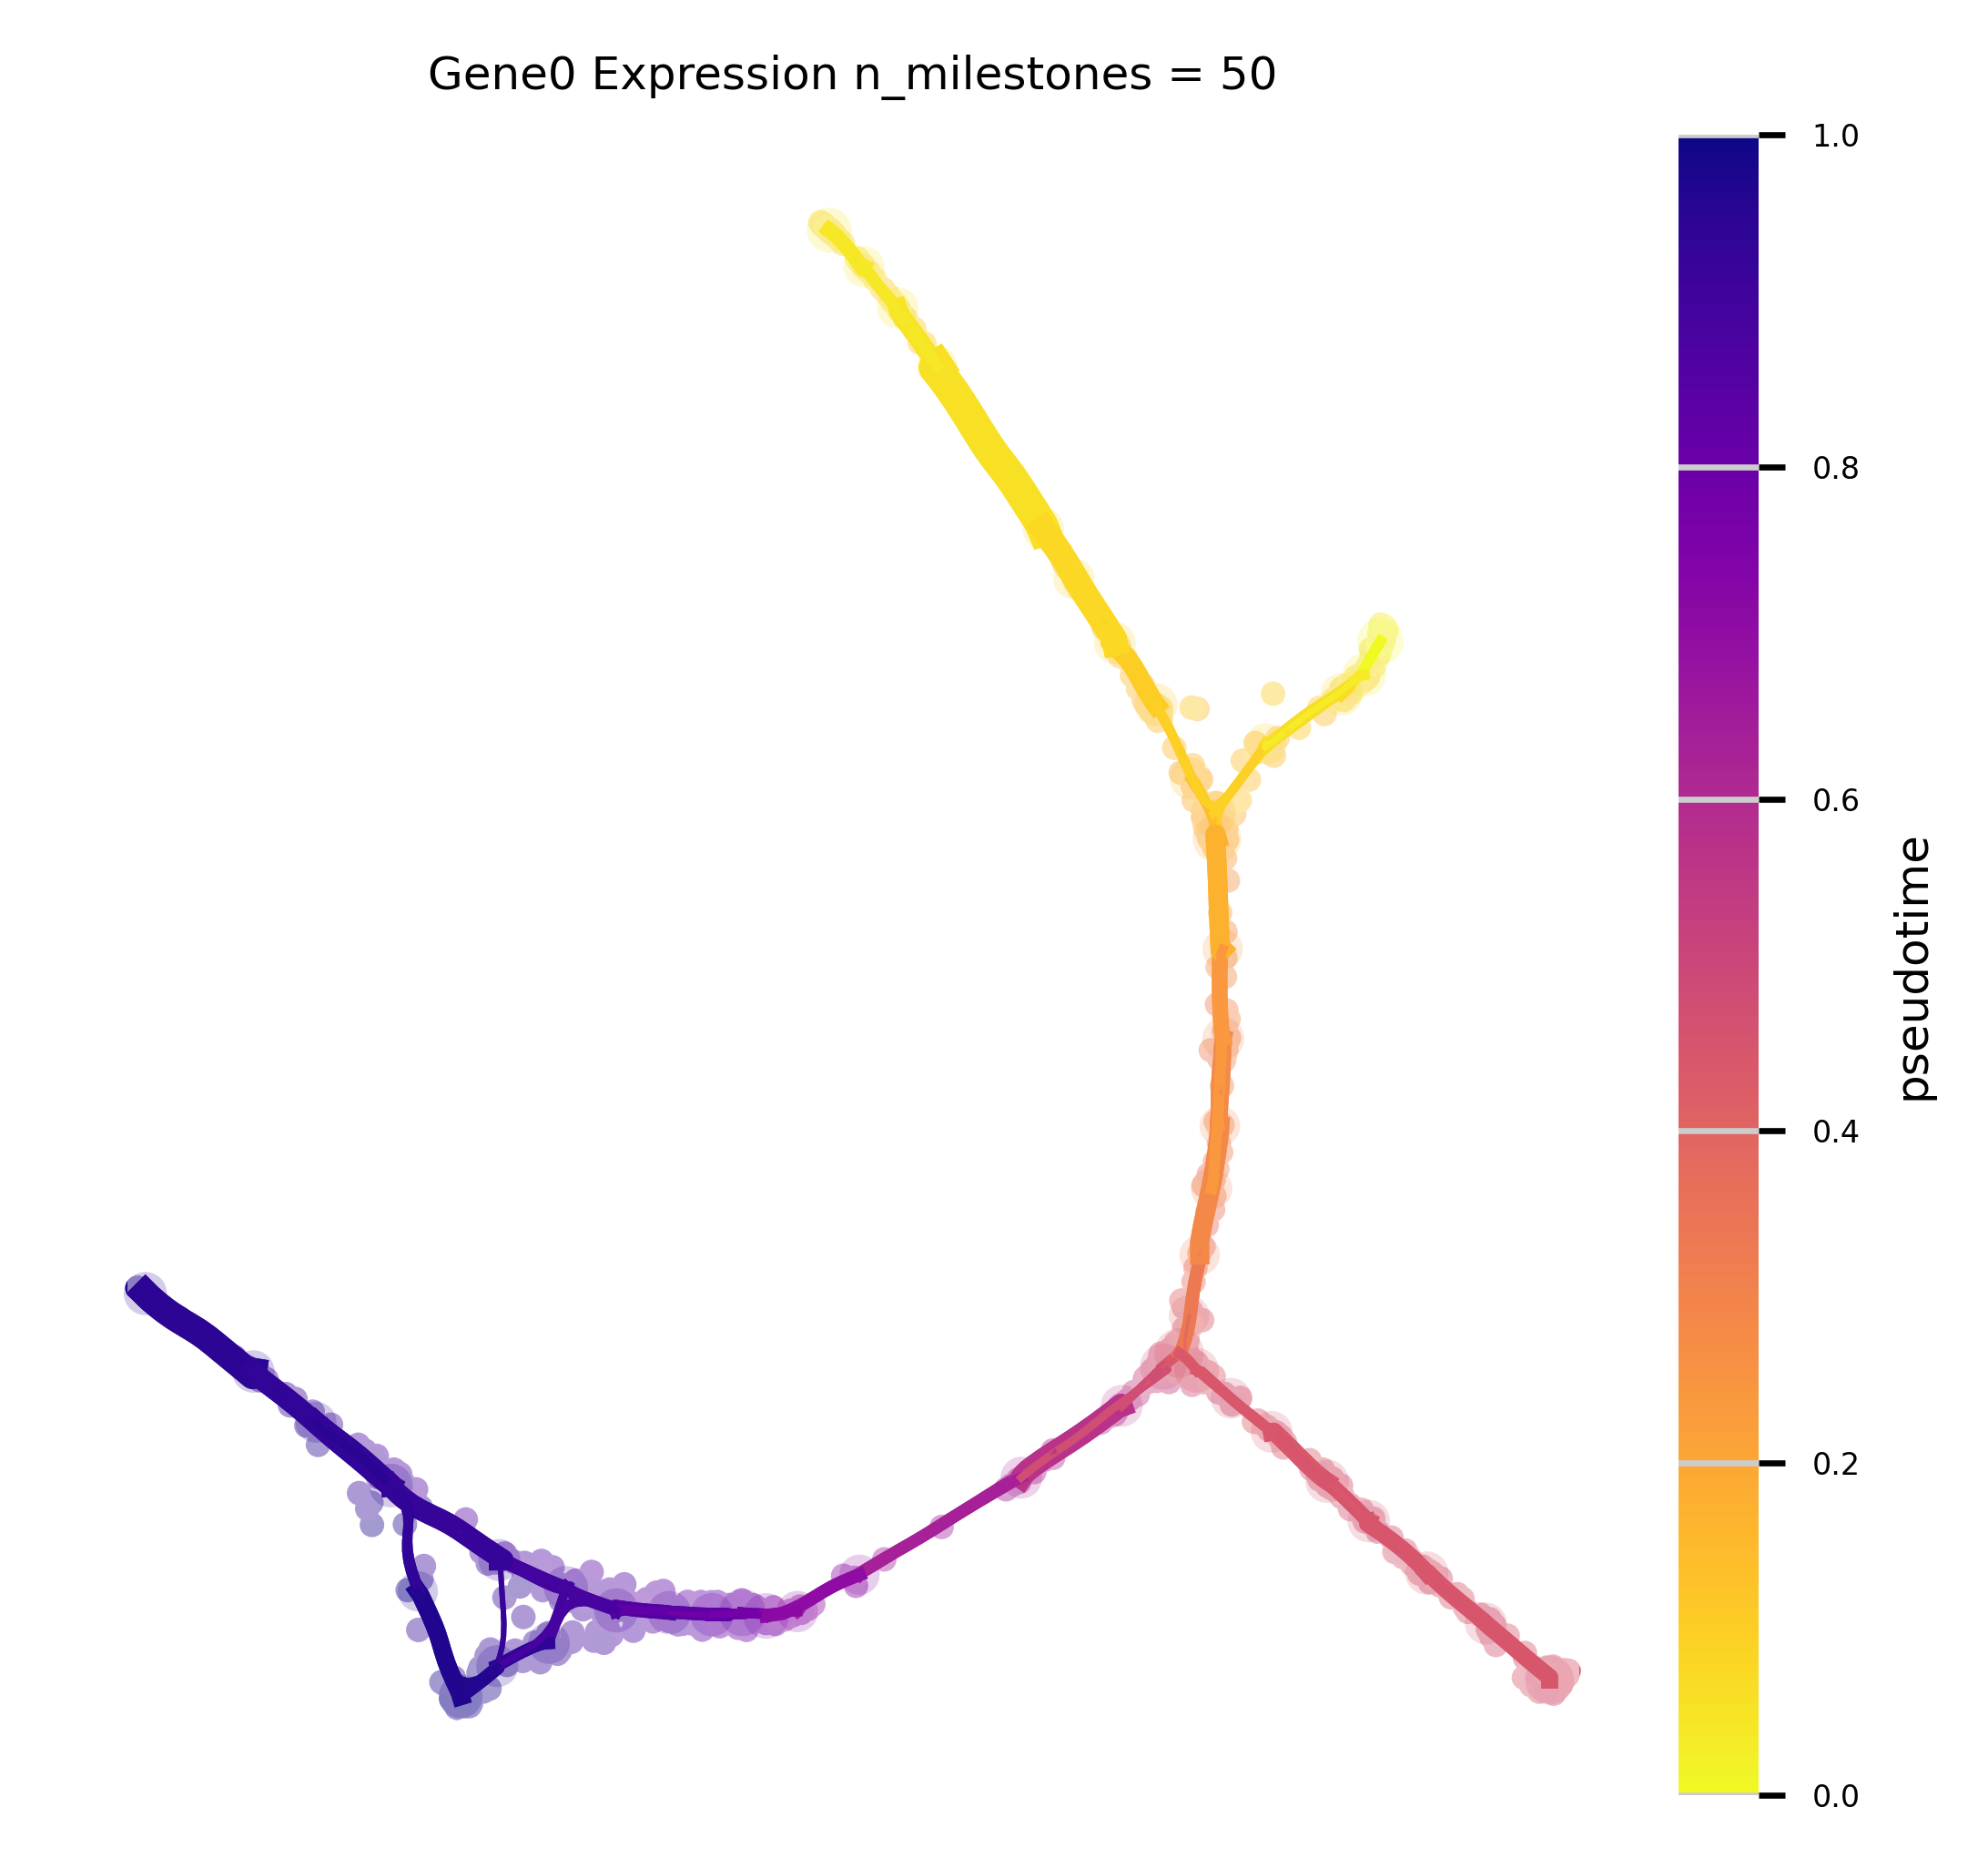

In [23]:

f,ax = plot_atlas_view(via_object=v0, n_milestones=25, linewidth_bundle=0.5, alpha_bundle_factor=2,
                     cmap='plasma_r', facecolor='white', size_scatter=15, alpha_scatter=0.2, scale_scatter_size_pop=True,
                     extra_title_text='pseudotime', headwidth_bundle=2.5, text_labels=True, sc_labels=true_label)
f,ax = plot_atlas_view(via_object=v0, n_milestones=50, linewidth_bundle=1.5, alpha_bundle_factor=2,
                     cmap='plasma_r', facecolor='white', size_scatter=15, alpha_scatter=0.2, scale_scatter_size_pop=True,
                     extra_title_text='Gene0 Expression', headwidth_bundle=0.5, sc_labels_expression = adata_counts.obsm['X_pca'][:, 0].tolist(), text_labels=False, sc_labels=true_label)


### Lineage probabilities
Plot the lineage probabilities for each lineage (associated with a terminal state)

2023-10-05 18:25:05.712008	Marker_lineages: [4, 7, 8, 9, 10]
2023-10-05 18:25:05.712586	Automatically setting embedding to via_object.embedding
2023-10-05 18:25:05.713293	The number of components in the original full graph is 1
2023-10-05 18:25:05.713334	For downstream visualization purposes we are also constructing a low knn-graph 
2023-10-05 18:25:06.291711	Check sc pb 1.0 
f getting majority comp
2023-10-05 18:25:06.333180	Cluster path on clustergraph starting from Root Cluster 6 to Terminal Cluster 4: [6, 3, 1, 11, 2, 4]
2023-10-05 18:25:06.333220	Cluster path on clustergraph starting from Root Cluster 6 to Terminal Cluster 7: [6, 3, 1, 12, 0, 5, 7]
2023-10-05 18:25:06.333236	Cluster path on clustergraph starting from Root Cluster 6 to Terminal Cluster 8: [6, 3, 1, 11, 2, 8]
2023-10-05 18:25:06.333250	Cluster path on clustergraph starting from Root Cluster 6 to Terminal Cluster 9: [6, 3, 1, 11, 2, 8, 9]
2023-10-05 18:25:06.333264	Cluster path on clustergraph starting from Root Clus

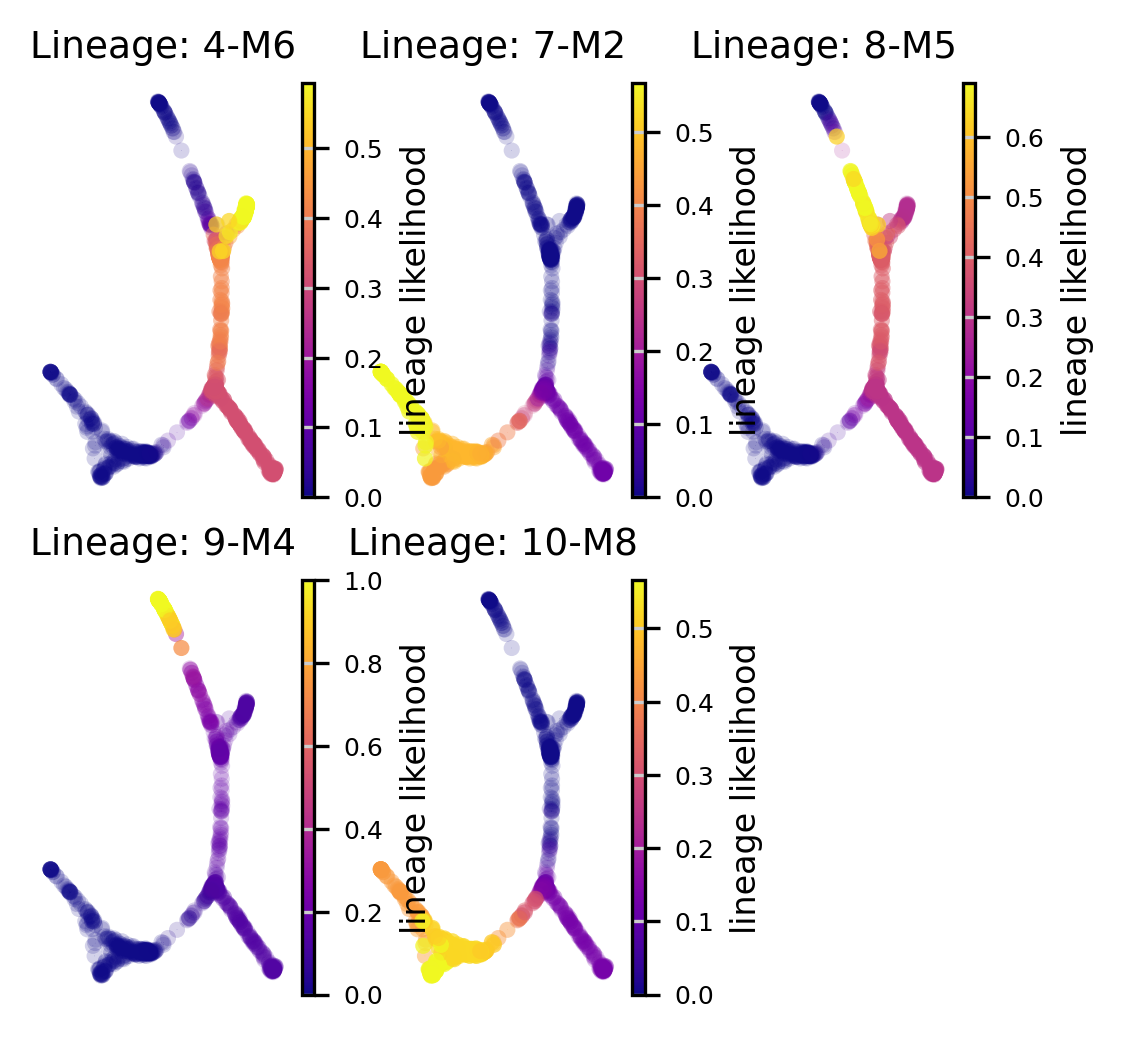

In [21]:
f, axs = plot_sc_lineage_probability(via_object=v0) #or set  embedding=embedding_of_your_choice
plt.show()
f.set_size_inches(15,2)

### Lineage Pathways - using the Atlas View

2023-10-05 18:26:08.143393	Computing Edges
2023-10-05 18:26:08.143473	Start finding milestones
2023-10-05 18:26:08.829388	End milestones with 50
2023-10-05 18:26:08.831557	Recompute weights
2023-10-05 18:26:08.835825	pruning milestone graph based on recomputed weights
2023-10-05 18:26:08.836610	Graph has 1 connected components before pruning
2023-10-05 18:26:08.837207	Graph has 1 connected components after pruning
2023-10-05 18:26:08.838213	Graph has 1 connected components after reconnecting
2023-10-05 18:26:08.839006	regenerate igraph on pruned edges
2023-10-05 18:26:08.843670	Setting numeric label as time_series_labels or other sequential metadata for coloring edges
2023-10-05 18:26:08.854083	Making smooth edges
location of 4 is at [0] and 0
location of 7 is at [1] and 1
location of 8 is at [2] and 2


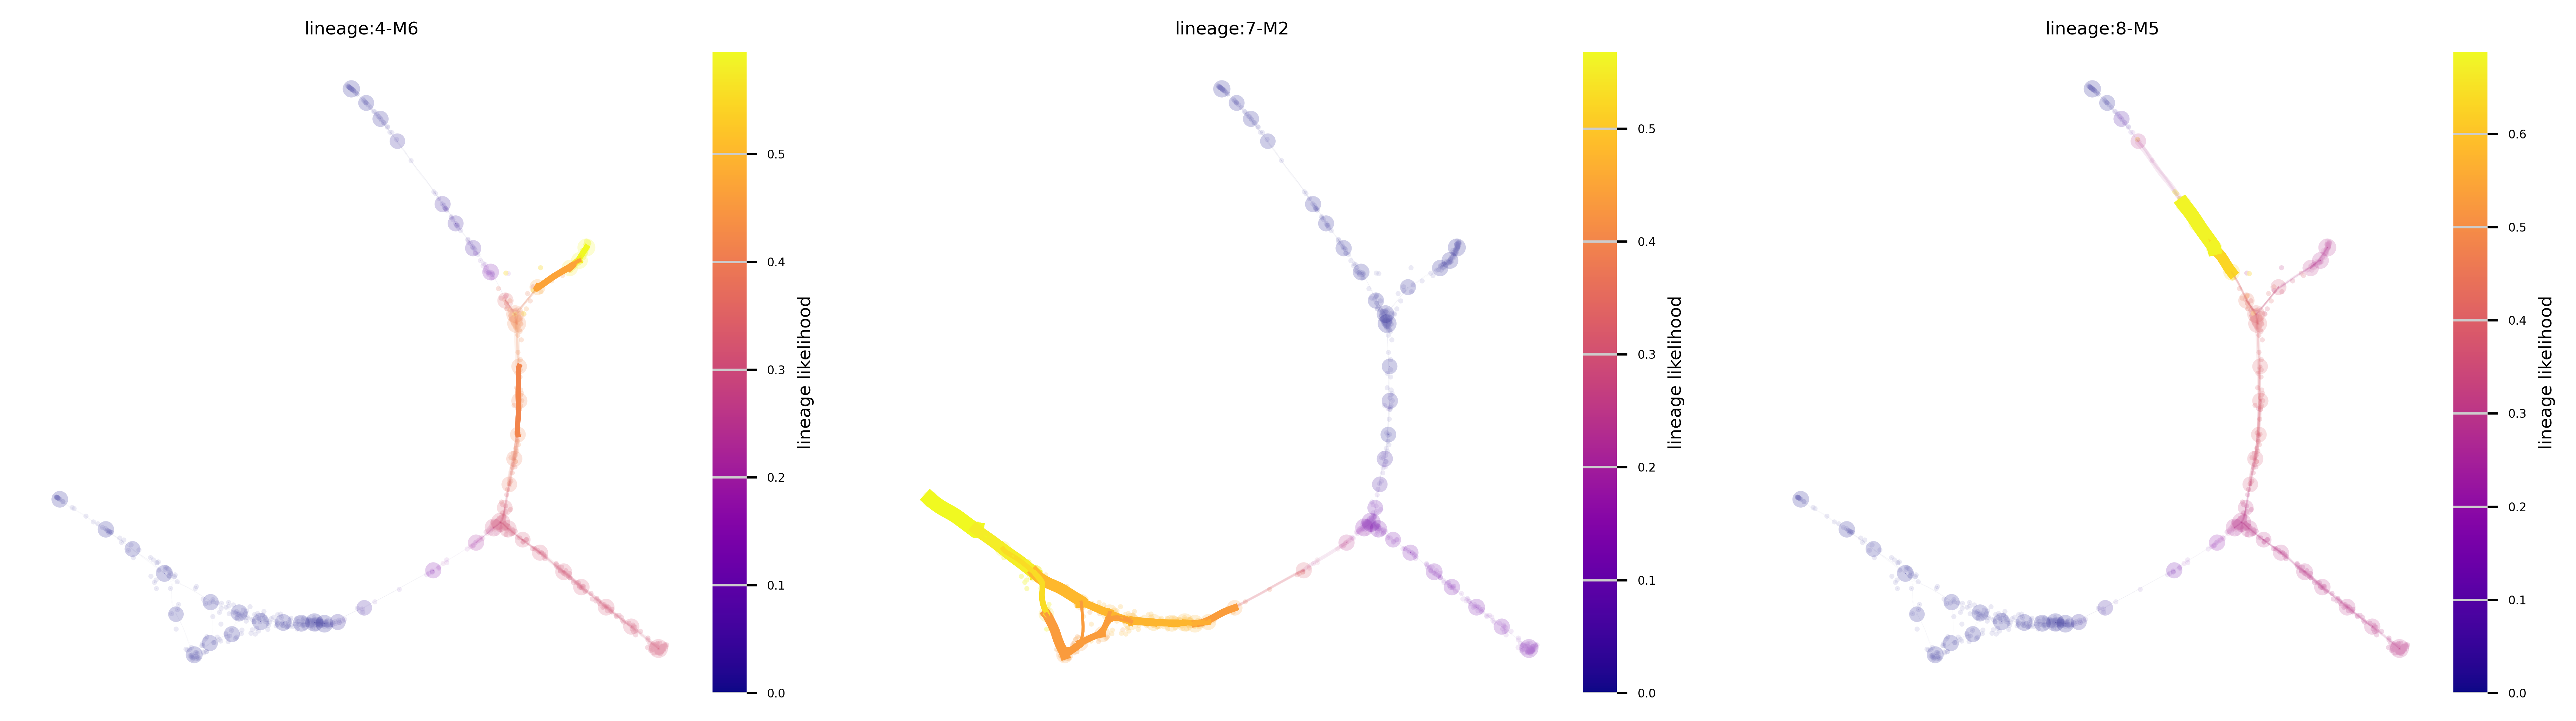

In [22]:
f,ax = plot_atlas_view(via_object=v0, n_milestones=50, linewidth_bundle=1.5, alpha_bundle_factor=2,
                     cmap='plasma', facecolor='white', size_scatter=15, alpha_scatter=0.2, scale_scatter_size_pop=True,
                     extra_title_text='', headwidth_bundle=0.5, lineage_pathway = [4,7,8], text_labels=False, sc_labels=true_label)
f.set_size_inches(15,4)

###  Gene Dynamics
Plot the gene expression levels along each lineage for marker genes. Here we use dummy values for the Genes which are just the values of the initial PCs for illustrative purposes

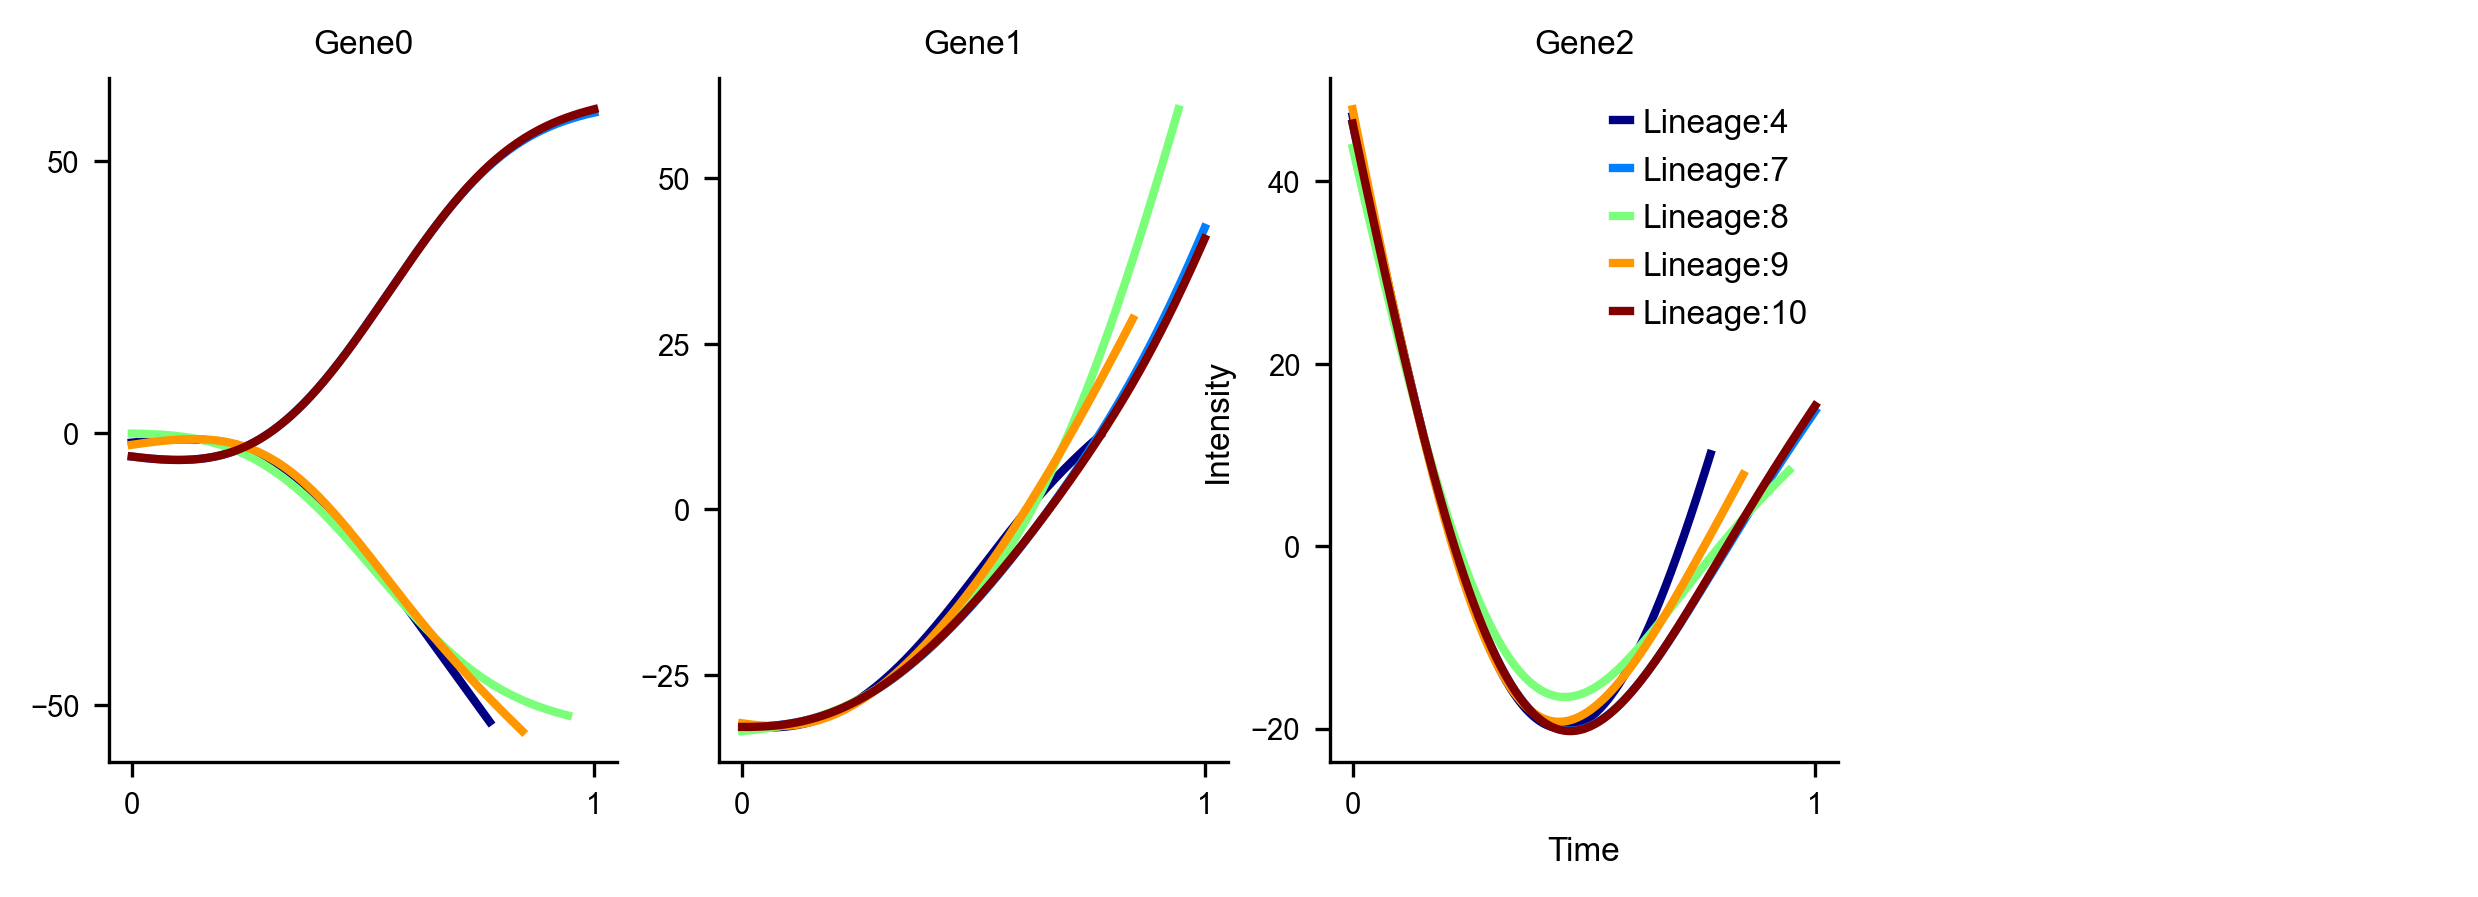

In [19]:
df_subset = pd.DataFrame(adata_counts.obsm['X_pca'][:, 0:3], columns=['Gene0', 'Gene1', 'Gene2'])
f, axs = get_gene_expression(via0=v0, gene_exp=df_subset, cmap='jet',linewidth=2, fontsize_=8, spline_order=4, n_splines=10) #default parameters shown here for retrieving gene expression
f.set_size_inches(10,3)


branches [4, 8, 9]


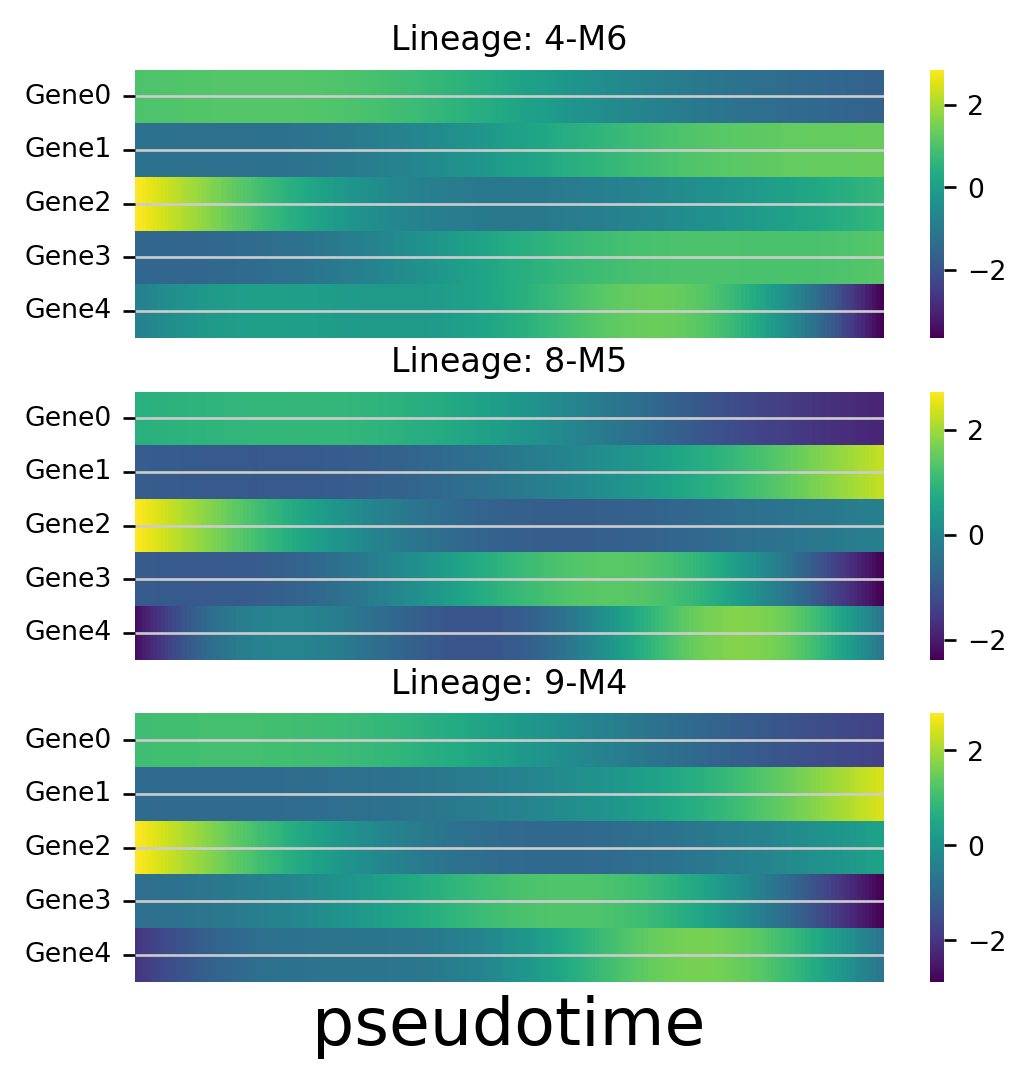

In [24]:
df_genes = pd.DataFrame(adata_counts.obsm['X_pca'][:, 0:5], columns=['Gene0', 'Gene1', 'Gene2', 'Gene3', 'Gene4'])

f, axlist = plot_gene_trend_heatmaps(via_object=v0, df_gene_exp=df_genes, marker_lineages=[4,8,9])
axlist[-1].set_xlabel("pseudotime", fontsize=20)
f.set_size_inches(5,5)

### Pre-defined terminal states and Integrated Visualization 

- In some cases you may have a good idea of what the terminal states are, in this case you can set them when initalized VIA based on group level corresponding to true_label or single-cell level as a list of string or integers
    - `user_defined_terminal_group=['M6','M8','M2','M7']`
    - `user_defined_terminal_cell = [89,560,808]`
- You may not have a precomputed embedding, doing this as part of the VIA analysis is very fast. The embeddings can also be refined after running VIA once you have a via_object available
- If you have timeseries data then this is strongly recommended as you can get superior visualization that make use of the temporal information provided by `time_series = True` and `time_series_labels` (list of numeric values of length nsamples)
- If you have very large data using via-mds is also recommended as it is very fast
- 'via-mds' is generally faster but can require more parameter adjustment that 'via-umap' to optimize the visualization
    - `do_compute_embedding = True`
    - `embedding_type = 'via-mds' or 'via-umap'`

2023-01-05 11:39:11.107267	Running VIA over input data of 1000 (samples) x 30 (features)
2023-01-05 11:39:11.107435	Knngraph has 20 neighbors
2023-01-05 11:39:11.394790	Finished global pruning of 20-knn graph used for clustering at level of 0.15. Kept 46.7 % of edges. 
2023-01-05 11:39:11.399722	Number of connected components used for clustergraph  is 1
2023-01-05 11:39:11.425567	Run via-mds
2023-01-05 11:39:11.425667	Commencing Via-MDS
2023-01-05 11:39:11.425883	Resetting n_milestones to 1000 as n_samples > original n_milestones
2023-01-05 11:39:11.781384	Start computing with diffusion power:2
2023-01-05 11:39:11.804889	Starting MDS on milestone
2023-01-05 11:39:12.599374	End computing mds with diffusion power:2
2023-01-05 11:39:12.600595	Commencing community detection
2023-01-05 11:39:12.633515	Finished running Leiden algorithm. Found 43 clusters.
2023-01-05 11:39:12.633911	Merging 30 very small clusters (<10)
2023-01-05 11:39:12.634848	Finished detecting communities. Found 13 commun

No handles with labels found to put in legend.


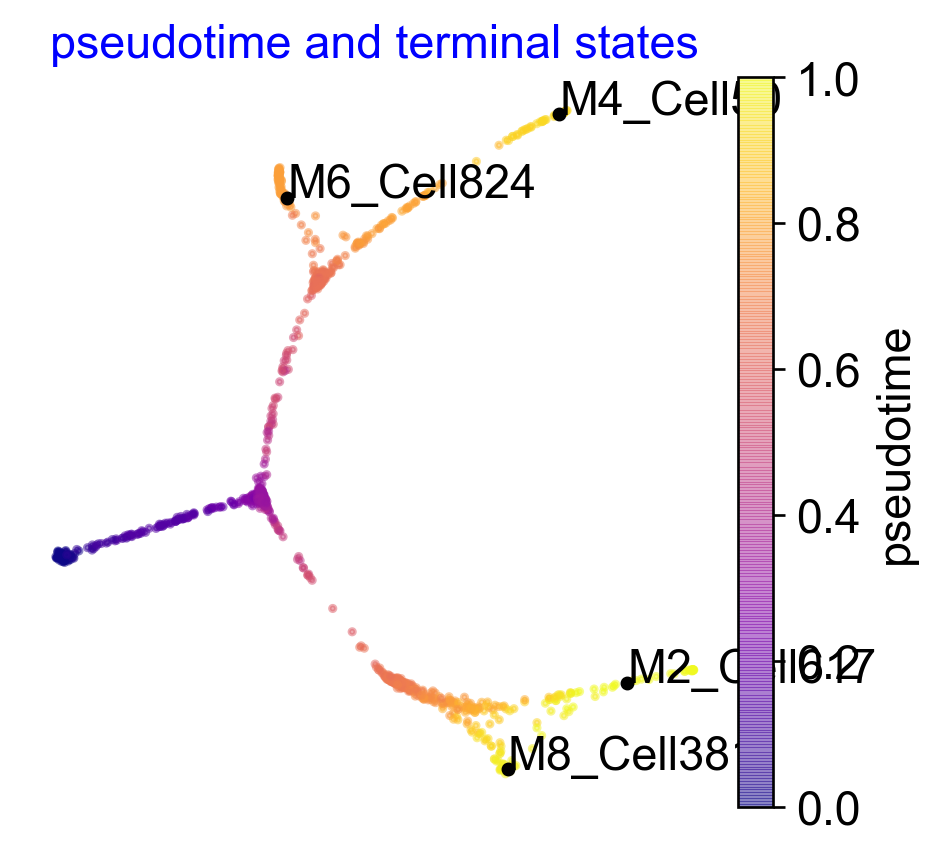

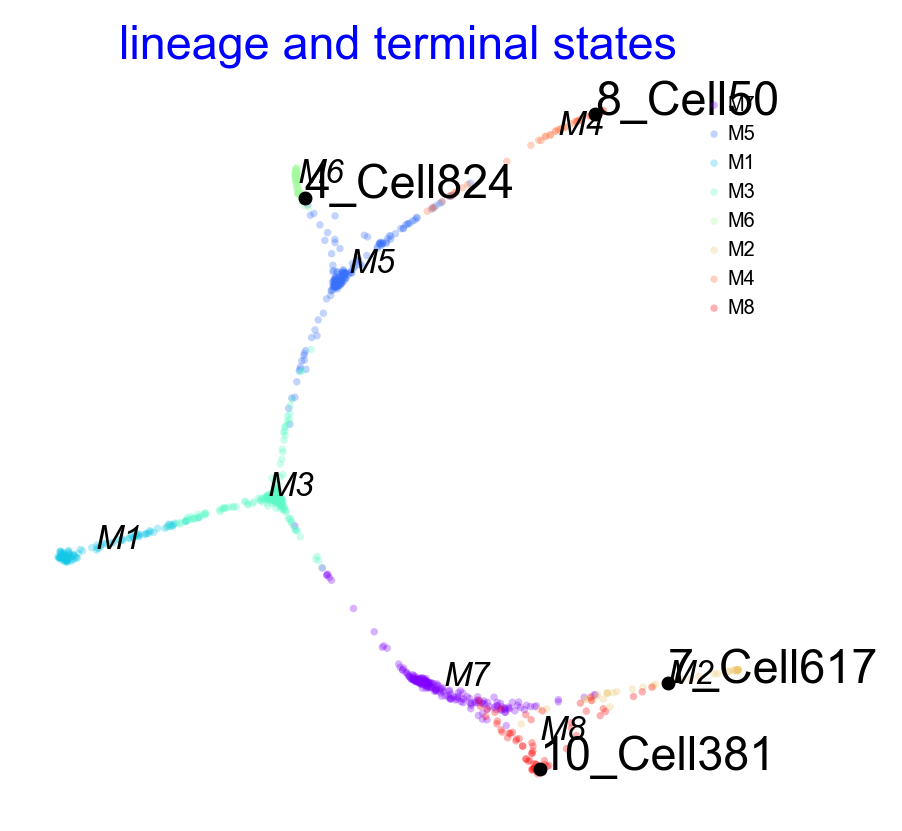

2023-01-05 11:39:16.675769	Time elapsed 5.4 seconds


In [5]:
#define parameters
ncomps, knn, random_seed, dataset, root_user  =30,20, 42,'toy', ['M1']

v0 = VIA(adata_counts.obsm['X_pca'][:, 0:ncomps], true_label, edgepruning_clustering_resolution=0.15, edgepruning_clustering_resolution_local=1,
             knn=knn, cluster_graph_pruning=1, too_big_factor=0.3, root_user=root_user, preserve_disconnected=True, dataset='group',
             random_seed=random_seed, user_defined_terminal_group=['M6','M8','M2','M4'], do_compute_embedding = True, embedding_type = 'via-mds')
v0.run_VIA()
